# 环境配置

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/LSTM")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
BSrf1000.mat  DataProcess  test1.ipynb	    test2.ipynb  train.csv
DATA	      IMG	   test2_all.ipynb  train2.csv


# 导入数据

In [0]:
from scipy.io import loadmat
import pandas as pd

m = loadmat("BSrf1000.mat")

# 处理数据DataProcess()
似乎无法直接来实现文件的命名为特定格式和文件的保存，还是用os.chdir来做吧   
后续把此写作新的函数放在main中

In [0]:
# show the keys
# print(m.keys())
# 一共9个基站来做分析预测
def DataProcess(name, station):
  # 用name来实现获得每一个基站的名字
  print(name)
  # 知道结果正确把print(m[name])给注释掉
  # print(m[name])
  df = pd.DataFrame(m[name])
  # 在google drive上可能无法实现直接存储并以特定形式命名的文件，因此采用重新定向到文件夹的方法来做
  os.chdir("/content/drive/My Drive/LSTM/DataProcess")
  csv_name = name + ".csv"
  df.to_csv(csv_name)
  os.chdir("/content/drive/My Drive/LSTM")

# 预测功能也改写成函数predict()

In [0]:
def predict(name):
  # 添加内容：读取所有的列数来做后续的预测内容
  for i in range(1,21):
    # show the data
    csv_name = name + ".csv"
    os.chdir("/content/drive/My Drive/LSTM/DataProcess")
    path = "/content/drive/My Drive/LSTM/IMG/" + name
    folder = os.path.exists(path)
    if not folder:
      os.makedirs(path)
    dataframe = read_csv(csv_name ,usecols = [i], engine = "python", skipfooter = 3)
    dataset  = dataframe.values
    # change int to float
    dataset = dataset.astype("float32")

    # 后两行为显示图像，实际可删掉
    # plt.plot(dataset)
    # plt.show()

    # 加载数据集，前90%作为训练集，后10%作为测试集
    def creat_dataset(dataset, look_back = 1):
      dataX, dataY = [], []
      for i in range(len(dataset) - look_back - 1):
        a = dataset[i: (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
      return numpy.array(dataX), numpy.array(dataY)
  
    # fix random seed for reproducibility
    numpy.random.seed(7)

    # normalize the data
    scaler = MinMaxScaler(feature_range = (0, 1))
    dataset = scaler.fit_transform(dataset)

    # split into train and test set
    train_size  = int(len(dataset) * 0.9)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # use this function to prepare the train and test dataset for model
    look_back = 1
    trainX, trainY = creat_dataset(train, look_back)
    testX, testY = creat_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

    # creat and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape = (1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


    # plot baseline and predictions
    print('第' + str(i) + "幅图像")
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    os.chdir(path)
    plt.savefig(name + "-" + str(i) + ".jpg")
    plt.show()
    print("=================================================================")
    os.chdir("/content/drive/My Drive/LSTM")

## 头文件

In [5]:
import os
import numpy
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


BaseStationnum5




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 3s - loss: 0.0744
Epoch 2/20
 - 1s - loss: 0.0192
Epoch 3/20
 - 1s - loss: 0.0128
Epoch 4/20
 - 1s - loss: 0.0072
Epoch 5/20
 - 1s - loss: 0.0033
Epoch 6/20
 - 1s - loss: 0.0015
Epoch 7/20
 - 1s - loss: 0.0010
Epoch 8/20
 - 1s - loss: 9.1995e-04
Epoch 9/20
 - 1s - loss: 9.0860e-04
Epoch 10/20
 - 1s - loss: 9.2533e-04
Epoch 11/20
 - 1s - loss: 9.4354e-04
Epoch 12/20
 - 1s - loss: 9.2514e-04
Epoch 13/20
 - 1s - loss: 9.1603e-04
Epoch 14/20
 - 1s - loss: 9.1448e-04
Epoch 15/20
 - 1s - loss: 9.1779e-04
Epoch 16/20
 - 1s - loss: 9.1313e-04
Epoch 17/20
 - 1s - loss: 9.2256e-04
Epoch 18/20
 - 1s - loss: 9.1487e-04
Epoch 19/20
 - 1s - loss: 9.2413e-04
Epoch 20/20
 - 1s - loss: 9.2002e-04
第1幅图像


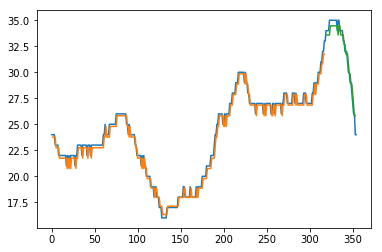

Epoch 1/20
 - 2s - loss: 0.0662
Epoch 2/20
 - 1s - loss: 0.0189
Epoch 3/20
 - 1s - loss: 0.0130
Epoch 4/20
 - 1s - loss: 0.0077
Epoch 5/20
 - 1s - loss: 0.0041
Epoch 6/20
 - 1s - loss: 0.0024
Epoch 7/20
 - 1s - loss: 0.0020
Epoch 8/20
 - 1s - loss: 0.0018
Epoch 9/20
 - 1s - loss: 0.0018
Epoch 10/20
 - 1s - loss: 0.0018
Epoch 11/20
 - 1s - loss: 0.0019
Epoch 12/20
 - 1s - loss: 0.0018
Epoch 13/20
 - 1s - loss: 0.0019
Epoch 14/20
 - 1s - loss: 0.0019
Epoch 15/20
 - 1s - loss: 0.0019
Epoch 16/20
 - 1s - loss: 0.0018
Epoch 17/20
 - 1s - loss: 0.0018
Epoch 18/20
 - 1s - loss: 0.0018
Epoch 19/20
 - 1s - loss: 0.0019
Epoch 20/20
 - 1s - loss: 0.0018
第2幅图像


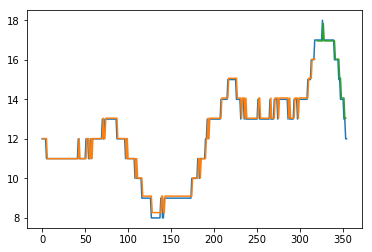

Epoch 1/20
 - 2s - loss: 0.0706
Epoch 2/20
 - 1s - loss: 0.0171
Epoch 3/20
 - 1s - loss: 0.0128
Epoch 4/20
 - 1s - loss: 0.0088
Epoch 5/20
 - 1s - loss: 0.0057
Epoch 6/20
 - 1s - loss: 0.0038
Epoch 7/20
 - 1s - loss: 0.0030
Epoch 8/20
 - 1s - loss: 0.0028
Epoch 9/20
 - 1s - loss: 0.0027
Epoch 10/20
 - 1s - loss: 0.0027
Epoch 11/20
 - 1s - loss: 0.0027
Epoch 12/20
 - 1s - loss: 0.0027
Epoch 13/20
 - 1s - loss: 0.0027
Epoch 14/20
 - 1s - loss: 0.0027
Epoch 15/20
 - 1s - loss: 0.0027
Epoch 16/20
 - 1s - loss: 0.0027
Epoch 17/20
 - 1s - loss: 0.0027
Epoch 18/20
 - 1s - loss: 0.0027
Epoch 19/20
 - 1s - loss: 0.0027
Epoch 20/20
 - 1s - loss: 0.0027
第3幅图像


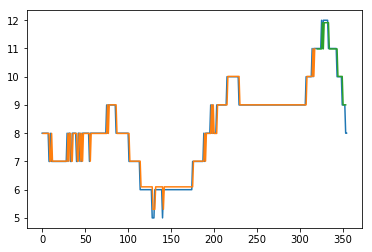

Epoch 1/20
 - 3s - loss: 0.0764
Epoch 2/20
 - 1s - loss: 0.0218
Epoch 3/20
 - 1s - loss: 0.0157
Epoch 4/20
 - 1s - loss: 0.0105
Epoch 5/20
 - 1s - loss: 0.0071
Epoch 6/20
 - 1s - loss: 0.0054
Epoch 7/20
 - 1s - loss: 0.0048
Epoch 8/20
 - 1s - loss: 0.0048
Epoch 9/20
 - 1s - loss: 0.0048
Epoch 10/20
 - 1s - loss: 0.0048
Epoch 11/20
 - 1s - loss: 0.0048
Epoch 12/20
 - 1s - loss: 0.0048
Epoch 13/20
 - 1s - loss: 0.0048
Epoch 14/20
 - 1s - loss: 0.0048
Epoch 15/20
 - 1s - loss: 0.0048
Epoch 16/20
 - 1s - loss: 0.0048
Epoch 17/20
 - 1s - loss: 0.0048
Epoch 18/20
 - 1s - loss: 0.0048
Epoch 19/20
 - 1s - loss: 0.0048
Epoch 20/20
 - 1s - loss: 0.0048
第4幅图像


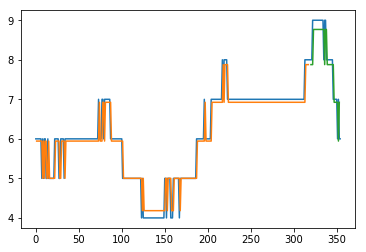

Epoch 1/20
 - 3s - loss: 0.0855
Epoch 2/20
 - 1s - loss: 0.0241
Epoch 3/20
 - 1s - loss: 0.0202
Epoch 4/20
 - 1s - loss: 0.0171
Epoch 5/20
 - 1s - loss: 0.0146
Epoch 6/20
 - 1s - loss: 0.0130
Epoch 7/20
 - 1s - loss: 0.0122
Epoch 8/20
 - 1s - loss: 0.0117
Epoch 9/20
 - 1s - loss: 0.0116
Epoch 10/20
 - 1s - loss: 0.0114
Epoch 11/20
 - 1s - loss: 0.0114
Epoch 12/20
 - 1s - loss: 0.0114
Epoch 13/20
 - 1s - loss: 0.0116
Epoch 14/20
 - 1s - loss: 0.0115
Epoch 15/20
 - 1s - loss: 0.0114
Epoch 16/20
 - 1s - loss: 0.0115
Epoch 17/20
 - 1s - loss: 0.0113
Epoch 18/20
 - 1s - loss: 0.0114
Epoch 19/20
 - 1s - loss: 0.0113
Epoch 20/20
 - 1s - loss: 0.0115
第5幅图像


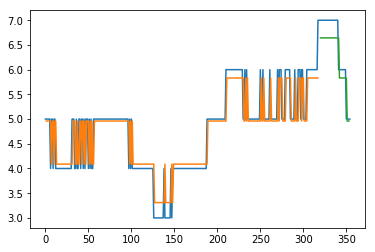

Epoch 1/20
 - 3s - loss: 0.0667
Epoch 2/20
 - 1s - loss: 0.0287
Epoch 3/20
 - 1s - loss: 0.0217
Epoch 4/20
 - 1s - loss: 0.0166
Epoch 5/20
 - 1s - loss: 0.0137
Epoch 6/20
 - 1s - loss: 0.0126
Epoch 7/20
 - 1s - loss: 0.0122
Epoch 8/20
 - 1s - loss: 0.0122
Epoch 9/20
 - 1s - loss: 0.0121
Epoch 10/20
 - 1s - loss: 0.0120
Epoch 11/20
 - 1s - loss: 0.0119
Epoch 12/20
 - 1s - loss: 0.0120
Epoch 13/20
 - 1s - loss: 0.0118
Epoch 14/20
 - 1s - loss: 0.0120
Epoch 15/20
 - 1s - loss: 0.0119
Epoch 16/20
 - 1s - loss: 0.0118
Epoch 17/20
 - 1s - loss: 0.0117
Epoch 18/20
 - 1s - loss: 0.0118
Epoch 19/20
 - 1s - loss: 0.0116
Epoch 20/20
 - 1s - loss: 0.0117
第6幅图像


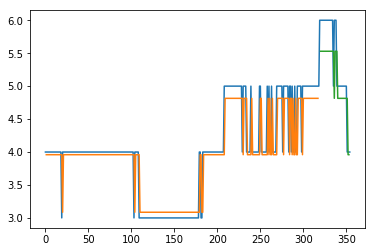

Epoch 1/20
 - 3s - loss: 0.0980
Epoch 2/20
 - 1s - loss: 0.0208
Epoch 3/20
 - 1s - loss: 0.0160
Epoch 4/20
 - 1s - loss: 0.0119
Epoch 5/20
 - 1s - loss: 0.0087
Epoch 6/20
 - 1s - loss: 0.0066
Epoch 7/20
 - 1s - loss: 0.0055
Epoch 8/20
 - 1s - loss: 0.0051
Epoch 9/20
 - 1s - loss: 0.0050
Epoch 10/20
 - 1s - loss: 0.0049
Epoch 11/20
 - 1s - loss: 0.0050
Epoch 12/20
 - 1s - loss: 0.0050
Epoch 13/20
 - 1s - loss: 0.0050
Epoch 14/20
 - 1s - loss: 0.0050
Epoch 15/20
 - 1s - loss: 0.0049
Epoch 16/20
 - 1s - loss: 0.0050
Epoch 17/20
 - 1s - loss: 0.0050
Epoch 18/20
 - 1s - loss: 0.0049
Epoch 19/20
 - 1s - loss: 0.0050
Epoch 20/20
 - 1s - loss: 0.0050
第7幅图像


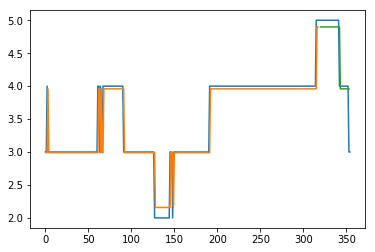

Epoch 1/20
 - 4s - loss: 0.1039
Epoch 2/20
 - 1s - loss: 0.0334
Epoch 3/20
 - 1s - loss: 0.0244
Epoch 4/20
 - 1s - loss: 0.0173
Epoch 5/20
 - 1s - loss: 0.0125
Epoch 6/20
 - 1s - loss: 0.0100
Epoch 7/20
 - 1s - loss: 0.0090
Epoch 8/20
 - 1s - loss: 0.0086
Epoch 9/20
 - 1s - loss: 0.0086
Epoch 10/20
 - 1s - loss: 0.0086
Epoch 11/20
 - 1s - loss: 0.0085
Epoch 12/20
 - 1s - loss: 0.0085
Epoch 13/20
 - 1s - loss: 0.0085
Epoch 14/20
 - 1s - loss: 0.0085
Epoch 15/20
 - 1s - loss: 0.0084
Epoch 16/20
 - 1s - loss: 0.0085
Epoch 17/20
 - 1s - loss: 0.0084
Epoch 18/20
 - 1s - loss: 0.0086
Epoch 19/20
 - 1s - loss: 0.0085
Epoch 20/20
 - 1s - loss: 0.0084
第8幅图像


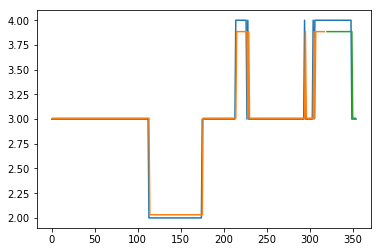

Epoch 1/20
 - 3s - loss: 0.0733
Epoch 2/20
 - 1s - loss: 0.0314
Epoch 3/20
 - 1s - loss: 0.0216
Epoch 4/20
 - 1s - loss: 0.0159
Epoch 5/20
 - 1s - loss: 0.0137
Epoch 6/20
 - 1s - loss: 0.0132
Epoch 7/20
 - 1s - loss: 0.0130
Epoch 8/20
 - 1s - loss: 0.0130
Epoch 9/20
 - 1s - loss: 0.0131
Epoch 10/20
 - 1s - loss: 0.0131
Epoch 11/20
 - 1s - loss: 0.0131
Epoch 12/20
 - 1s - loss: 0.0130
Epoch 13/20
 - 1s - loss: 0.0130
Epoch 14/20
 - 1s - loss: 0.0132
Epoch 15/20
 - 1s - loss: 0.0130
Epoch 16/20
 - 1s - loss: 0.0130
Epoch 17/20
 - 1s - loss: 0.0129
Epoch 18/20
 - 1s - loss: 0.0130
Epoch 19/20
 - 1s - loss: 0.0130
Epoch 20/20
 - 2s - loss: 0.0130
第9幅图像


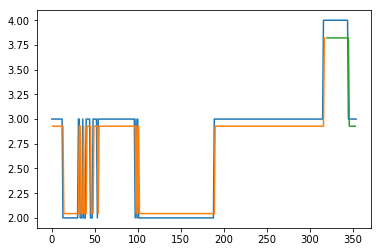

Epoch 1/20
 - 4s - loss: 0.0597
Epoch 2/20
 - 2s - loss: 0.0279
Epoch 3/20
 - 1s - loss: 0.0126
Epoch 4/20
 - 1s - loss: 0.0064
Epoch 5/20
 - 1s - loss: 0.0056
Epoch 6/20
 - 1s - loss: 0.0055
Epoch 7/20
 - 1s - loss: 0.0055
Epoch 8/20
 - 1s - loss: 0.0055
Epoch 9/20
 - 1s - loss: 0.0055
Epoch 10/20
 - 1s - loss: 0.0055
Epoch 11/20
 - 1s - loss: 0.0056
Epoch 12/20
 - 1s - loss: 0.0055
Epoch 13/20
 - 1s - loss: 0.0055
Epoch 14/20
 - 1s - loss: 0.0055
Epoch 15/20
 - 1s - loss: 0.0057
Epoch 16/20
 - 1s - loss: 0.0055
Epoch 17/20
 - 1s - loss: 0.0056
Epoch 18/20
 - 1s - loss: 0.0055
Epoch 19/20
 - 1s - loss: 0.0055
Epoch 20/20
 - 1s - loss: 0.0055
第10幅图像


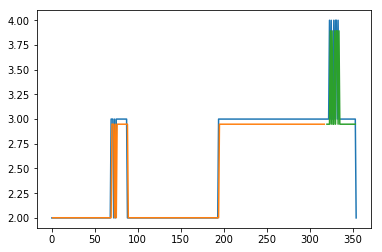

Epoch 1/20
 - 4s - loss: 0.1311
Epoch 2/20
 - 1s - loss: 0.0288
Epoch 3/20
 - 1s - loss: 0.0270
Epoch 4/20
 - 1s - loss: 0.0269
Epoch 5/20
 - 1s - loss: 0.0261
Epoch 6/20
 - 1s - loss: 0.0258
Epoch 7/20
 - 1s - loss: 0.0253
Epoch 8/20
 - 1s - loss: 0.0250
Epoch 9/20
 - 1s - loss: 0.0248
Epoch 10/20
 - 1s - loss: 0.0246
Epoch 11/20
 - 1s - loss: 0.0245
Epoch 12/20
 - 1s - loss: 0.0244
Epoch 13/20
 - 1s - loss: 0.0242
Epoch 14/20
 - 1s - loss: 0.0243
Epoch 15/20
 - 1s - loss: 0.0244
Epoch 16/20
 - 1s - loss: 0.0242
Epoch 17/20
 - 1s - loss: 0.0244
Epoch 18/20
 - 1s - loss: 0.0242
Epoch 19/20
 - 1s - loss: 0.0241
Epoch 20/20
 - 1s - loss: 0.0242
第11幅图像


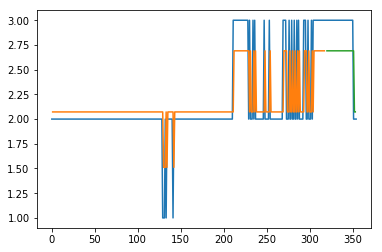

Epoch 1/20
 - 5s - loss: 0.0894
Epoch 2/20
 - 1s - loss: 0.0222
Epoch 3/20
 - 1s - loss: 0.0210
Epoch 4/20
 - 1s - loss: 0.0197
Epoch 5/20
 - 1s - loss: 0.0189
Epoch 6/20
 - 1s - loss: 0.0180
Epoch 7/20
 - 1s - loss: 0.0176
Epoch 8/20
 - 1s - loss: 0.0171
Epoch 9/20
 - 1s - loss: 0.0167
Epoch 10/20
 - 1s - loss: 0.0166
Epoch 11/20
 - 1s - loss: 0.0164
Epoch 12/20
 - 1s - loss: 0.0162
Epoch 13/20
 - 1s - loss: 0.0162
Epoch 14/20
 - 1s - loss: 0.0163
Epoch 15/20
 - 1s - loss: 0.0161
Epoch 16/20
 - 1s - loss: 0.0161
Epoch 17/20
 - 1s - loss: 0.0161
Epoch 18/20
 - 1s - loss: 0.0160
Epoch 19/20
 - 1s - loss: 0.0160
Epoch 20/20
 - 1s - loss: 0.0161
第12幅图像


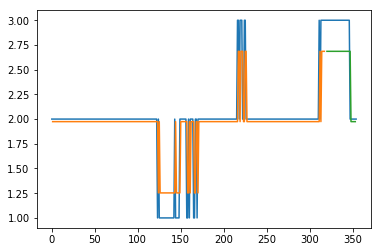

Epoch 1/20
 - 5s - loss: 0.0735
Epoch 2/20
 - 1s - loss: 0.0196
Epoch 3/20
 - 1s - loss: 0.0164
Epoch 4/20
 - 1s - loss: 0.0139
Epoch 5/20
 - 1s - loss: 0.0120
Epoch 6/20
 - 1s - loss: 0.0109
Epoch 7/20
 - 1s - loss: 0.0103
Epoch 8/20
 - 1s - loss: 0.0100
Epoch 9/20
 - 1s - loss: 0.0099
Epoch 10/20
 - 1s - loss: 0.0099
Epoch 11/20
 - 1s - loss: 0.0098
Epoch 12/20
 - 1s - loss: 0.0097
Epoch 13/20
 - 1s - loss: 0.0099
Epoch 14/20
 - 1s - loss: 0.0098
Epoch 15/20
 - 1s - loss: 0.0098
Epoch 16/20
 - 1s - loss: 0.0099
Epoch 17/20
 - 1s - loss: 0.0099
Epoch 18/20
 - 1s - loss: 0.0098
Epoch 19/20
 - 1s - loss: 0.0099
Epoch 20/20
 - 1s - loss: 0.0098
第13幅图像


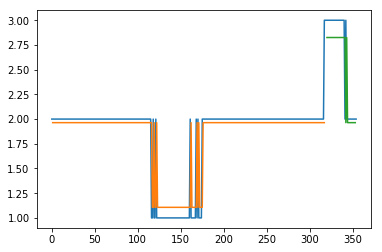

Epoch 1/20
 - 5s - loss: 0.0742
Epoch 2/20
 - 1s - loss: 0.0247
Epoch 3/20
 - 1s - loss: 0.0192
Epoch 4/20
 - 1s - loss: 0.0153
Epoch 5/20
 - 1s - loss: 0.0133
Epoch 6/20
 - 1s - loss: 0.0125
Epoch 7/20
 - 1s - loss: 0.0121
Epoch 8/20
 - 1s - loss: 0.0119
Epoch 9/20
 - 1s - loss: 0.0119
Epoch 10/20
 - 1s - loss: 0.0119
Epoch 11/20
 - 1s - loss: 0.0120
Epoch 12/20
 - 1s - loss: 0.0120
Epoch 13/20
 - 1s - loss: 0.0121
Epoch 14/20
 - 1s - loss: 0.0119
Epoch 15/20
 - 1s - loss: 0.0119
Epoch 16/20
 - 1s - loss: 0.0118
Epoch 17/20
 - 1s - loss: 0.0119
Epoch 18/20
 - 1s - loss: 0.0120
Epoch 19/20
 - 1s - loss: 0.0120
Epoch 20/20
 - 1s - loss: 0.0121
第14幅图像


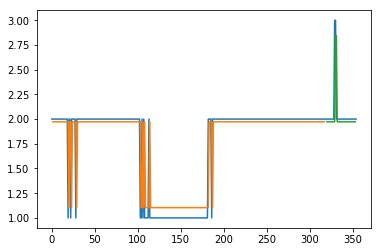

Epoch 1/20
 - 6s - loss: 0.3339
Epoch 2/20
 - 1s - loss: 0.1177
Epoch 3/20
 - 1s - loss: 0.0894
Epoch 4/20
 - 1s - loss: 0.0784
Epoch 5/20
 - 1s - loss: 0.0734
Epoch 6/20
 - 1s - loss: 0.0711
Epoch 7/20
 - 1s - loss: 0.0706
Epoch 8/20
 - 1s - loss: 0.0701
Epoch 9/20
 - 1s - loss: 0.0702
Epoch 10/20
 - 1s - loss: 0.0700
Epoch 11/20
 - 1s - loss: 0.0704
Epoch 12/20
 - 1s - loss: 0.0704
Epoch 13/20
 - 1s - loss: 0.0701
Epoch 14/20
 - 1s - loss: 0.0703
Epoch 15/20
 - 1s - loss: 0.0704
Epoch 16/20
 - 1s - loss: 0.0702
Epoch 17/20
 - 1s - loss: 0.0703
Epoch 18/20
 - 1s - loss: 0.0703
Epoch 19/20
 - 1s - loss: 0.0702
Epoch 20/20
 - 1s - loss: 0.0702
第15幅图像


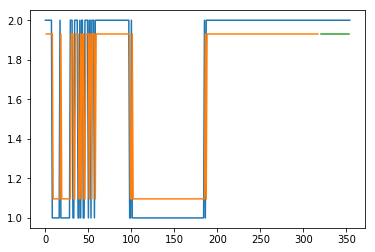

Epoch 1/20
 - 6s - loss: 0.2841
Epoch 2/20
 - 1s - loss: 0.1173
Epoch 3/20
 - 1s - loss: 0.0743
Epoch 4/20
 - 1s - loss: 0.0576
Epoch 5/20
 - 1s - loss: 0.0527
Epoch 6/20
 - 1s - loss: 0.0515
Epoch 7/20
 - 1s - loss: 0.0512
Epoch 8/20
 - 1s - loss: 0.0510
Epoch 9/20
 - 1s - loss: 0.0515
Epoch 10/20
 - 1s - loss: 0.0514
Epoch 11/20
 - 1s - loss: 0.0513
Epoch 12/20
 - 1s - loss: 0.0511
Epoch 13/20
 - 1s - loss: 0.0512
Epoch 14/20
 - 1s - loss: 0.0511
Epoch 15/20
 - 1s - loss: 0.0515
Epoch 16/20
 - 1s - loss: 0.0513
Epoch 17/20
 - 1s - loss: 0.0513
Epoch 18/20
 - 1s - loss: 0.0511
Epoch 19/20
 - 1s - loss: 0.0514
Epoch 20/20
 - 1s - loss: 0.0512
第16幅图像


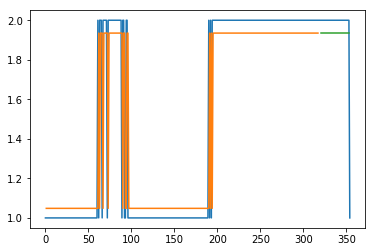

Epoch 1/20
 - 6s - loss: 0.2550
Epoch 2/20
 - 1s - loss: 0.1190
Epoch 3/20
 - 1s - loss: 0.0703
Epoch 4/20
 - 1s - loss: 0.0510
Epoch 5/20
 - 1s - loss: 0.0466
Epoch 6/20
 - 1s - loss: 0.0457
Epoch 7/20
 - 1s - loss: 0.0457
Epoch 8/20
 - 1s - loss: 0.0455
Epoch 9/20
 - 1s - loss: 0.0452
Epoch 10/20
 - 1s - loss: 0.0456
Epoch 11/20
 - 1s - loss: 0.0456
Epoch 12/20
 - 1s - loss: 0.0456
Epoch 13/20
 - 1s - loss: 0.0454
Epoch 14/20
 - 1s - loss: 0.0461
Epoch 15/20
 - 1s - loss: 0.0454
Epoch 16/20
 - 1s - loss: 0.0457
Epoch 17/20
 - 1s - loss: 0.0456
Epoch 18/20
 - 1s - loss: 0.0457
Epoch 19/20
 - 1s - loss: 0.0456
Epoch 20/20
 - 1s - loss: 0.0452
第17幅图像


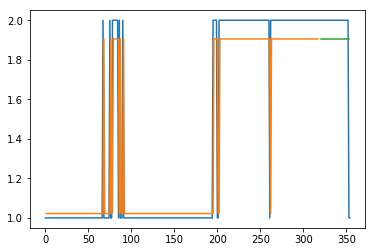

Epoch 1/20
 - 6s - loss: 0.1681
Epoch 2/20
 - 1s - loss: 0.1320
Epoch 3/20
 - 1s - loss: 0.1160
Epoch 4/20
 - 1s - loss: 0.1058
Epoch 5/20
 - 1s - loss: 0.1009
Epoch 6/20
 - 1s - loss: 0.0994
Epoch 7/20
 - 1s - loss: 0.0986
Epoch 8/20
 - 1s - loss: 0.0981
Epoch 9/20
 - 1s - loss: 0.0983
Epoch 10/20
 - 1s - loss: 0.0983
Epoch 11/20
 - 1s - loss: 0.0983
Epoch 12/20
 - 1s - loss: 0.0987
Epoch 13/20
 - 1s - loss: 0.0984
Epoch 14/20
 - 1s - loss: 0.0983
Epoch 15/20
 - 1s - loss: 0.0983
Epoch 16/20
 - 1s - loss: 0.0984
Epoch 17/20
 - 1s - loss: 0.0983
Epoch 18/20
 - 1s - loss: 0.0987
Epoch 19/20
 - 1s - loss: 0.0982
Epoch 20/20
 - 1s - loss: 0.0982
第18幅图像


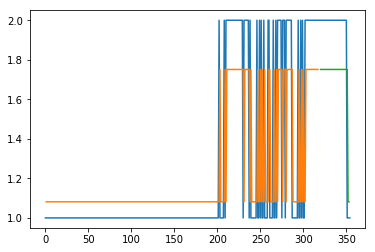

Epoch 1/20
 - 6s - loss: 0.0617
Epoch 2/20
 - 1s - loss: 0.0542
Epoch 3/20
 - 1s - loss: 0.0472
Epoch 4/20
 - 1s - loss: 0.0401
Epoch 5/20
 - 1s - loss: 0.0341
Epoch 6/20
 - 1s - loss: 0.0301
Epoch 7/20
 - 1s - loss: 0.0278
Epoch 8/20
 - 1s - loss: 0.0269
Epoch 9/20
 - 1s - loss: 0.0265
Epoch 10/20
 - 1s - loss: 0.0264
Epoch 11/20
 - 1s - loss: 0.0262
Epoch 12/20
 - 1s - loss: 0.0263
Epoch 13/20
 - 2s - loss: 0.0263
Epoch 14/20
 - 2s - loss: 0.0263
Epoch 15/20
 - 2s - loss: 0.0264
Epoch 16/20
 - 2s - loss: 0.0262
Epoch 17/20
 - 1s - loss: 0.0263
Epoch 18/20
 - 1s - loss: 0.0263
Epoch 19/20
 - 1s - loss: 0.0263
Epoch 20/20
 - 1s - loss: 0.0262
第19幅图像


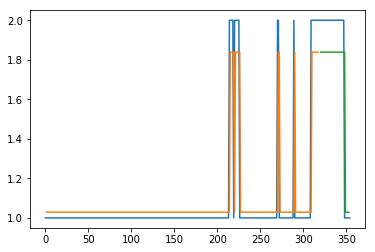

Epoch 1/20
 - 6s - loss: 0.0445
Epoch 2/20
 - 1s - loss: 0.0413
Epoch 3/20
 - 1s - loss: 0.0382
Epoch 4/20
 - 1s - loss: 0.0351
Epoch 5/20
 - 1s - loss: 0.0319
Epoch 6/20
 - 1s - loss: 0.0297
Epoch 7/20
 - 1s - loss: 0.0275
Epoch 8/20
 - 1s - loss: 0.0268
Epoch 9/20
 - 1s - loss: 0.0260
Epoch 10/20
 - 1s - loss: 0.0255
Epoch 11/20
 - 1s - loss: 0.0254
Epoch 12/20
 - 1s - loss: 0.0255
Epoch 13/20
 - 1s - loss: 0.0251
Epoch 14/20
 - 1s - loss: 0.0254
Epoch 15/20
 - 1s - loss: 0.0254
Epoch 16/20
 - 1s - loss: 0.0251
Epoch 17/20
 - 1s - loss: 0.0254
Epoch 18/20
 - 1s - loss: 0.0251
Epoch 19/20
 - 1s - loss: 0.0251
Epoch 20/20
 - 1s - loss: 0.0252
第20幅图像


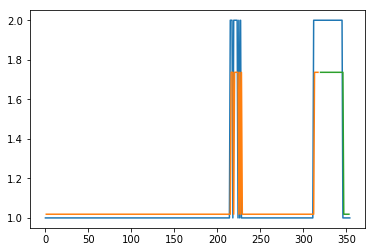

BaseStationnum6
Epoch 1/20
 - 7s - loss: 0.1051
Epoch 2/20
 - 1s - loss: 0.0264
Epoch 3/20
 - 1s - loss: 0.0181
Epoch 4/20
 - 1s - loss: 0.0113
Epoch 5/20
 - 1s - loss: 0.0056
Epoch 6/20
 - 1s - loss: 0.0023
Epoch 7/20
 - 1s - loss: 0.0011
Epoch 8/20
 - 1s - loss: 7.9485e-04
Epoch 9/20
 - 1s - loss: 7.6375e-04
Epoch 10/20
 - 1s - loss: 7.4612e-04
Epoch 11/20
 - 1s - loss: 7.5064e-04
Epoch 12/20
 - 1s - loss: 7.4822e-04
Epoch 13/20
 - 1s - loss: 7.3428e-04
Epoch 14/20
 - 1s - loss: 7.4687e-04
Epoch 15/20
 - 1s - loss: 7.3481e-04
Epoch 16/20
 - 1s - loss: 7.4015e-04
Epoch 17/20
 - 1s - loss: 7.3249e-04
Epoch 18/20
 - 1s - loss: 7.3443e-04
Epoch 19/20
 - 1s - loss: 7.3639e-04
Epoch 20/20
 - 1s - loss: 6.9971e-04
第1幅图像


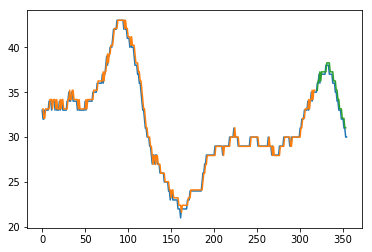

Epoch 1/20
 - 7s - loss: 0.0920
Epoch 2/20
 - 1s - loss: 0.0268
Epoch 3/20
 - 1s - loss: 0.0182
Epoch 4/20
 - 1s - loss: 0.0111
Epoch 5/20
 - 1s - loss: 0.0056
Epoch 6/20
 - 1s - loss: 0.0028
Epoch 7/20
 - 1s - loss: 0.0019
Epoch 8/20
 - 1s - loss: 0.0017
Epoch 9/20
 - 1s - loss: 0.0017
Epoch 10/20
 - 1s - loss: 0.0017
Epoch 11/20
 - 1s - loss: 0.0017
Epoch 12/20
 - 1s - loss: 0.0017
Epoch 13/20
 - 1s - loss: 0.0017
Epoch 14/20
 - 1s - loss: 0.0017
Epoch 15/20
 - 1s - loss: 0.0017
Epoch 16/20
 - 1s - loss: 0.0017
Epoch 17/20
 - 1s - loss: 0.0017
Epoch 18/20
 - 1s - loss: 0.0018
Epoch 19/20
 - 1s - loss: 0.0017
Epoch 20/20
 - 1s - loss: 0.0017
第2幅图像


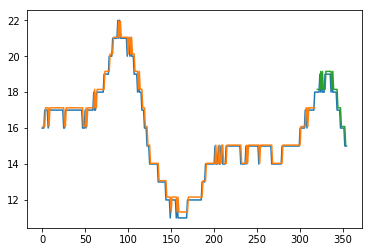

Epoch 1/20
 - 7s - loss: 0.1155
Epoch 2/20
 - 1s - loss: 0.0282
Epoch 3/20
 - 1s - loss: 0.0200
Epoch 4/20
 - 1s - loss: 0.0134
Epoch 5/20
 - 1s - loss: 0.0080
Epoch 6/20
 - 1s - loss: 0.0046
Epoch 7/20
 - 1s - loss: 0.0031
Epoch 8/20
 - 1s - loss: 0.0028
Epoch 9/20
 - 1s - loss: 0.0028
Epoch 10/20
 - 1s - loss: 0.0027
Epoch 11/20
 - 1s - loss: 0.0027
Epoch 12/20
 - 1s - loss: 0.0027
Epoch 13/20
 - 1s - loss: 0.0027
Epoch 14/20
 - 1s - loss: 0.0027
Epoch 15/20
 - 1s - loss: 0.0027
Epoch 16/20
 - 1s - loss: 0.0027
Epoch 17/20
 - 1s - loss: 0.0027
Epoch 18/20
 - 1s - loss: 0.0027
Epoch 19/20
 - 1s - loss: 0.0027
Epoch 20/20
 - 1s - loss: 0.0027
第3幅图像


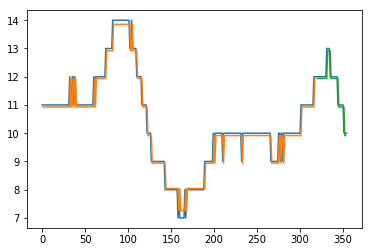

Epoch 1/20
 - 8s - loss: 0.0971
Epoch 2/20
 - 1s - loss: 0.0244
Epoch 3/20
 - 1s - loss: 0.0184
Epoch 4/20
 - 1s - loss: 0.0133
Epoch 5/20
 - 1s - loss: 0.0089
Epoch 6/20
 - 1s - loss: 0.0060
Epoch 7/20
 - 1s - loss: 0.0045
Epoch 8/20
 - 1s - loss: 0.0040
Epoch 9/20
 - 1s - loss: 0.0038
Epoch 10/20
 - 1s - loss: 0.0038
Epoch 11/20
 - 1s - loss: 0.0038
Epoch 12/20
 - 1s - loss: 0.0038
Epoch 13/20
 - 1s - loss: 0.0038
Epoch 14/20
 - 1s - loss: 0.0038
Epoch 15/20
 - 1s - loss: 0.0038
Epoch 16/20
 - 1s - loss: 0.0038
Epoch 17/20
 - 1s - loss: 0.0039
Epoch 18/20
 - 1s - loss: 0.0038
Epoch 19/20
 - 1s - loss: 0.0039
Epoch 20/20
 - 1s - loss: 0.0039
第4幅图像


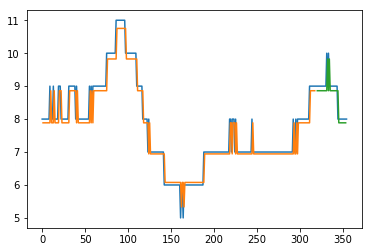

Epoch 1/20
 - 8s - loss: 0.0948
Epoch 2/20
 - 1s - loss: 0.0205
Epoch 3/20
 - 1s - loss: 0.0158
Epoch 4/20
 - 1s - loss: 0.0118
Epoch 5/20
 - 1s - loss: 0.0082
Epoch 6/20
 - 1s - loss: 0.0055
Epoch 7/20
 - 1s - loss: 0.0040
Epoch 8/20
 - 1s - loss: 0.0035
Epoch 9/20
 - 1s - loss: 0.0032
Epoch 10/20
 - 1s - loss: 0.0032
Epoch 11/20
 - 1s - loss: 0.0032
Epoch 12/20
 - 1s - loss: 0.0032
Epoch 13/20
 - 1s - loss: 0.0032
Epoch 14/20
 - 1s - loss: 0.0032
Epoch 15/20
 - 1s - loss: 0.0033
Epoch 16/20
 - 1s - loss: 0.0033
Epoch 17/20
 - 1s - loss: 0.0033
Epoch 18/20
 - 1s - loss: 0.0032
Epoch 19/20
 - 1s - loss: 0.0033
Epoch 20/20
 - 1s - loss: 0.0033
第5幅图像


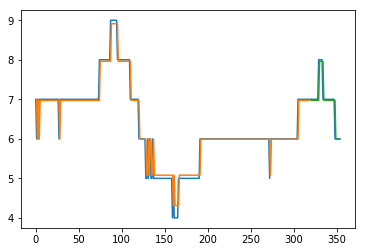

Epoch 1/20
 - 9s - loss: 0.1228
Epoch 2/20
 - 1s - loss: 0.0442
Epoch 3/20
 - 1s - loss: 0.0306
Epoch 4/20
 - 1s - loss: 0.0206
Epoch 5/20
 - 1s - loss: 0.0141
Epoch 6/20
 - 1s - loss: 0.0114
Epoch 7/20
 - 1s - loss: 0.0105
Epoch 8/20
 - 1s - loss: 0.0104
Epoch 9/20
 - 1s - loss: 0.0105
Epoch 10/20
 - 1s - loss: 0.0104
Epoch 11/20
 - 1s - loss: 0.0104
Epoch 12/20
 - 1s - loss: 0.0104
Epoch 13/20
 - 1s - loss: 0.0103
Epoch 14/20
 - 1s - loss: 0.0104
Epoch 15/20
 - 1s - loss: 0.0104
Epoch 16/20
 - 1s - loss: 0.0103
Epoch 17/20
 - 1s - loss: 0.0105
Epoch 18/20
 - 1s - loss: 0.0103
Epoch 19/20
 - 1s - loss: 0.0104
Epoch 20/20
 - 1s - loss: 0.0101
第6幅图像


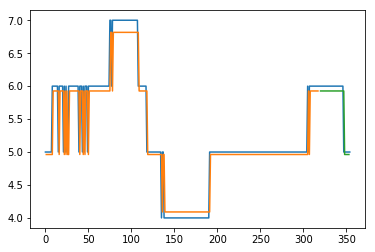

Epoch 1/20
 - 9s - loss: 0.1297
Epoch 2/20
 - 1s - loss: 0.0368
Epoch 3/20
 - 1s - loss: 0.0246
Epoch 4/20
 - 1s - loss: 0.0150
Epoch 5/20
 - 1s - loss: 0.0084
Epoch 6/20
 - 1s - loss: 0.0053
Epoch 7/20
 - 1s - loss: 0.0044
Epoch 8/20
 - 1s - loss: 0.0043
Epoch 9/20
 - 1s - loss: 0.0042
Epoch 10/20
 - 1s - loss: 0.0042
Epoch 11/20
 - 1s - loss: 0.0042
Epoch 12/20
 - 1s - loss: 0.0042
Epoch 13/20
 - 1s - loss: 0.0042
Epoch 14/20
 - 1s - loss: 0.0042
Epoch 15/20
 - 1s - loss: 0.0042
Epoch 16/20
 - 1s - loss: 0.0042
Epoch 17/20
 - 1s - loss: 0.0042
Epoch 18/20
 - 1s - loss: 0.0042
Epoch 19/20
 - 1s - loss: 0.0042
Epoch 20/20
 - 1s - loss: 0.0042
第7幅图像


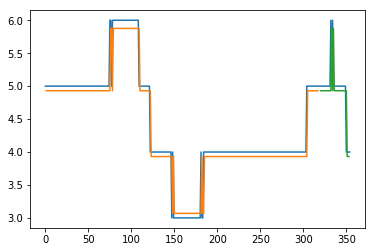

Epoch 1/20
 - 10s - loss: 0.1397
Epoch 2/20
 - 2s - loss: 0.0476
Epoch 3/20
 - 2s - loss: 0.0331
Epoch 4/20
 - 1s - loss: 0.0231
Epoch 5/20
 - 1s - loss: 0.0162
Epoch 6/20
 - 1s - loss: 0.0136
Epoch 7/20
 - 1s - loss: 0.0126
Epoch 8/20
 - 1s - loss: 0.0125
Epoch 9/20
 - 1s - loss: 0.0124
Epoch 10/20
 - 1s - loss: 0.0124
Epoch 11/20
 - 1s - loss: 0.0125
Epoch 12/20
 - 1s - loss: 0.0125
Epoch 13/20
 - 1s - loss: 0.0125
Epoch 14/20
 - 1s - loss: 0.0125
Epoch 15/20
 - 1s - loss: 0.0125
Epoch 16/20
 - 1s - loss: 0.0124
Epoch 17/20
 - 1s - loss: 0.0124
Epoch 18/20
 - 1s - loss: 0.0124
Epoch 19/20
 - 1s - loss: 0.0124
Epoch 20/20
 - 1s - loss: 0.0124
第8幅图像


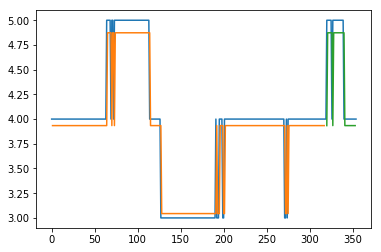

Epoch 1/20
 - 9s - loss: 0.1123
Epoch 2/20
 - 1s - loss: 0.0260
Epoch 3/20
 - 1s - loss: 0.0195
Epoch 4/20
 - 1s - loss: 0.0141
Epoch 5/20
 - 1s - loss: 0.0095
Epoch 6/20
 - 1s - loss: 0.0064
Epoch 7/20
 - 1s - loss: 0.0047
Epoch 8/20
 - 1s - loss: 0.0041
Epoch 9/20
 - 1s - loss: 0.0039
Epoch 10/20
 - 1s - loss: 0.0039
Epoch 11/20
 - 1s - loss: 0.0039
Epoch 12/20
 - 1s - loss: 0.0039
Epoch 13/20
 - 1s - loss: 0.0039
Epoch 14/20
 - 1s - loss: 0.0039
Epoch 15/20
 - 1s - loss: 0.0039
Epoch 16/20
 - 1s - loss: 0.0038
Epoch 17/20
 - 1s - loss: 0.0039
Epoch 18/20
 - 1s - loss: 0.0039
Epoch 19/20
 - 1s - loss: 0.0039
Epoch 20/20
 - 1s - loss: 0.0039
第9幅图像


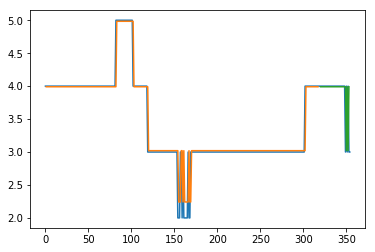

Epoch 1/20
 - 10s - loss: 0.1509
Epoch 2/20
 - 1s - loss: 0.0392
Epoch 3/20
 - 1s - loss: 0.0292
Epoch 4/20
 - 1s - loss: 0.0218
Epoch 5/20
 - 1s - loss: 0.0160
Epoch 6/20
 - 1s - loss: 0.0127
Epoch 7/20
 - 1s - loss: 0.0111
Epoch 8/20
 - 1s - loss: 0.0105
Epoch 9/20
 - 1s - loss: 0.0103
Epoch 10/20
 - 1s - loss: 0.0105
Epoch 11/20
 - 1s - loss: 0.0104
Epoch 12/20
 - 1s - loss: 0.0102
Epoch 13/20
 - 1s - loss: 0.0103
Epoch 14/20
 - 1s - loss: 0.0103
Epoch 15/20
 - 1s - loss: 0.0103
Epoch 16/20
 - 1s - loss: 0.0102
Epoch 17/20
 - 1s - loss: 0.0103
Epoch 18/20
 - 1s - loss: 0.0102
Epoch 19/20
 - 1s - loss: 0.0103
Epoch 20/20
 - 1s - loss: 0.0103
第10幅图像


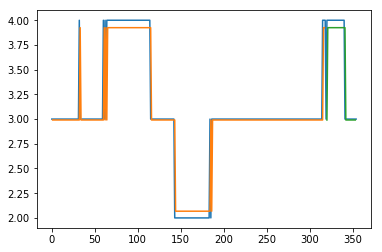

Epoch 1/20
 - 9s - loss: 0.1204
Epoch 2/20
 - 1s - loss: 0.0376
Epoch 3/20
 - 1s - loss: 0.0280
Epoch 4/20
 - 1s - loss: 0.0209
Epoch 5/20
 - 1s - loss: 0.0156
Epoch 6/20
 - 1s - loss: 0.0126
Epoch 7/20
 - 1s - loss: 0.0113
Epoch 8/20
 - 1s - loss: 0.0108
Epoch 9/20
 - 1s - loss: 0.0108
Epoch 10/20
 - 1s - loss: 0.0109
Epoch 11/20
 - 1s - loss: 0.0108
Epoch 12/20
 - 1s - loss: 0.0108
Epoch 13/20
 - 1s - loss: 0.0108
Epoch 14/20
 - 1s - loss: 0.0107
Epoch 15/20
 - 1s - loss: 0.0108
Epoch 16/20
 - 1s - loss: 0.0108
Epoch 17/20
 - 1s - loss: 0.0108
Epoch 18/20
 - 1s - loss: 0.0109
Epoch 19/20
 - 1s - loss: 0.0108
Epoch 20/20
 - 1s - loss: 0.0107
第11幅图像


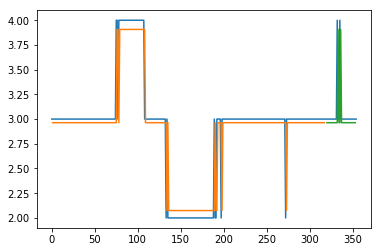

Epoch 1/20
 - 9s - loss: 0.0861
Epoch 2/20
 - 1s - loss: 0.0480
Epoch 3/20
 - 1s - loss: 0.0356
Epoch 4/20
 - 1s - loss: 0.0274
Epoch 5/20
 - 1s - loss: 0.0237
Epoch 6/20
 - 1s - loss: 0.0226
Epoch 7/20
 - 1s - loss: 0.0224
Epoch 8/20
 - 1s - loss: 0.0221
Epoch 9/20
 - 1s - loss: 0.0220
Epoch 10/20
 - 1s - loss: 0.0222
Epoch 11/20
 - 1s - loss: 0.0223
Epoch 12/20
 - 1s - loss: 0.0222
Epoch 13/20
 - 1s - loss: 0.0223
Epoch 14/20
 - 1s - loss: 0.0223
Epoch 15/20
 - 1s - loss: 0.0222
Epoch 16/20
 - 1s - loss: 0.0222
Epoch 17/20
 - 1s - loss: 0.0223
Epoch 18/20
 - 1s - loss: 0.0223
Epoch 19/20
 - 1s - loss: 0.0223
Epoch 20/20
 - 1s - loss: 0.0222
第12幅图像


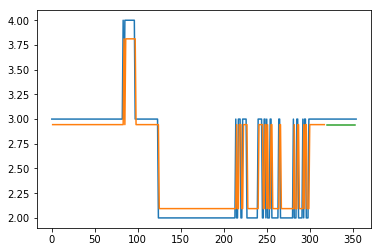

Epoch 1/20
 - 9s - loss: 0.2426
Epoch 2/20
 - 1s - loss: 0.1060
Epoch 3/20
 - 1s - loss: 0.0528
Epoch 4/20
 - 1s - loss: 0.0325
Epoch 5/20
 - 1s - loss: 0.0283
Epoch 6/20
 - 1s - loss: 0.0280
Epoch 7/20
 - 1s - loss: 0.0280
Epoch 8/20
 - 1s - loss: 0.0279
Epoch 9/20
 - 1s - loss: 0.0277
Epoch 10/20
 - 1s - loss: 0.0280
Epoch 11/20
 - 1s - loss: 0.0279
Epoch 12/20
 - 1s - loss: 0.0281
Epoch 13/20
 - 1s - loss: 0.0280
Epoch 14/20
 - 1s - loss: 0.0279
Epoch 15/20
 - 1s - loss: 0.0280
Epoch 16/20
 - 1s - loss: 0.0279
Epoch 17/20
 - 1s - loss: 0.0285
Epoch 18/20
 - 1s - loss: 0.0279
Epoch 19/20
 - 1s - loss: 0.0281
Epoch 20/20
 - 1s - loss: 0.0281
第13幅图像


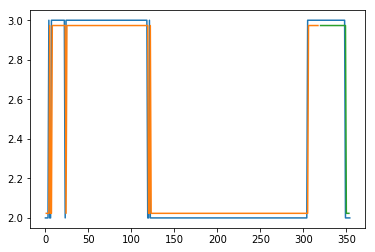

Epoch 1/20
 - 10s - loss: 0.1263
Epoch 2/20
 - 1s - loss: 0.0862
Epoch 3/20
 - 1s - loss: 0.0529
Epoch 4/20
 - 1s - loss: 0.0299
Epoch 5/20
 - 1s - loss: 0.0206
Epoch 6/20
 - 1s - loss: 0.0190
Epoch 7/20
 - 1s - loss: 0.0186
Epoch 8/20
 - 1s - loss: 0.0186
Epoch 9/20
 - 1s - loss: 0.0186
Epoch 10/20
 - 1s - loss: 0.0187
Epoch 11/20
 - 1s - loss: 0.0186
Epoch 12/20
 - 1s - loss: 0.0186
Epoch 13/20
 - 1s - loss: 0.0187
Epoch 14/20
 - 1s - loss: 0.0187
Epoch 15/20
 - 1s - loss: 0.0187
Epoch 16/20
 - 1s - loss: 0.0185
Epoch 17/20
 - 1s - loss: 0.0187
Epoch 18/20
 - 1s - loss: 0.0186
Epoch 19/20
 - 1s - loss: 0.0187
Epoch 20/20
 - 1s - loss: 0.0186
第14幅图像


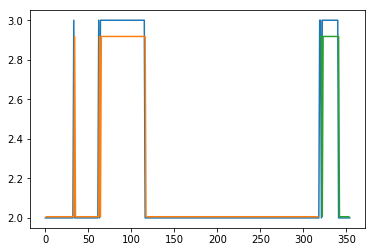

Epoch 1/20
 - 10s - loss: 0.1219
Epoch 2/20
 - 1s - loss: 0.0236
Epoch 3/20
 - 1s - loss: 0.0217
Epoch 4/20
 - 1s - loss: 0.0206
Epoch 5/20
 - 1s - loss: 0.0194
Epoch 6/20
 - 1s - loss: 0.0182
Epoch 7/20
 - 1s - loss: 0.0172
Epoch 8/20
 - 1s - loss: 0.0166
Epoch 9/20
 - 1s - loss: 0.0159
Epoch 10/20
 - 1s - loss: 0.0155
Epoch 11/20
 - 1s - loss: 0.0152
Epoch 12/20
 - 1s - loss: 0.0150
Epoch 13/20
 - 1s - loss: 0.0148
Epoch 14/20
 - 1s - loss: 0.0147
Epoch 15/20
 - 1s - loss: 0.0146
Epoch 16/20
 - 2s - loss: 0.0145
Epoch 17/20
 - 2s - loss: 0.0145
Epoch 18/20
 - 1s - loss: 0.0145
Epoch 19/20
 - 2s - loss: 0.0144
Epoch 20/20
 - 2s - loss: 0.0144
第15幅图像


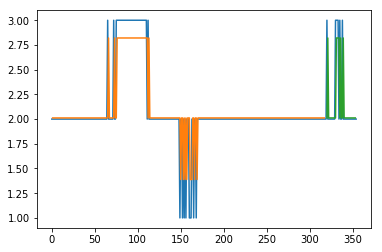

Epoch 1/20
 - 10s - loss: 0.1015
Epoch 2/20
 - 1s - loss: 0.0254
Epoch 3/20
 - 1s - loss: 0.0227
Epoch 4/20
 - 1s - loss: 0.0207
Epoch 5/20
 - 1s - loss: 0.0188
Epoch 6/20
 - 1s - loss: 0.0173
Epoch 7/20
 - 1s - loss: 0.0163
Epoch 8/20
 - 1s - loss: 0.0156
Epoch 9/20
 - 1s - loss: 0.0151
Epoch 10/20
 - 1s - loss: 0.0150
Epoch 11/20
 - 1s - loss: 0.0147
Epoch 12/20
 - 1s - loss: 0.0146
Epoch 13/20
 - 1s - loss: 0.0147
Epoch 14/20
 - 1s - loss: 0.0146
Epoch 15/20
 - 2s - loss: 0.0147
Epoch 16/20
 - 1s - loss: 0.0146
Epoch 17/20
 - 1s - loss: 0.0145
Epoch 18/20
 - 1s - loss: 0.0146
Epoch 19/20
 - 1s - loss: 0.0146
Epoch 20/20
 - 1s - loss: 0.0147
第16幅图像


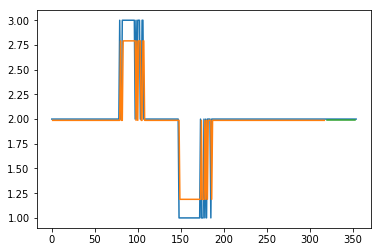

Epoch 1/20
 - 11s - loss: 0.0838
Epoch 2/20
 - 1s - loss: 0.0232
Epoch 3/20
 - 1s - loss: 0.0206
Epoch 4/20
 - 1s - loss: 0.0186
Epoch 5/20
 - 1s - loss: 0.0171
Epoch 6/20
 - 1s - loss: 0.0160
Epoch 7/20
 - 1s - loss: 0.0152
Epoch 8/20
 - 1s - loss: 0.0149
Epoch 9/20
 - 1s - loss: 0.0146
Epoch 10/20
 - 1s - loss: 0.0144
Epoch 11/20
 - 1s - loss: 0.0143
Epoch 12/20
 - 1s - loss: 0.0143
Epoch 13/20
 - 1s - loss: 0.0143
Epoch 14/20
 - 1s - loss: 0.0142
Epoch 15/20
 - 1s - loss: 0.0141
Epoch 16/20
 - 1s - loss: 0.0143
Epoch 17/20
 - 1s - loss: 0.0142
Epoch 18/20
 - 1s - loss: 0.0140
Epoch 19/20
 - 1s - loss: 0.0139
Epoch 20/20
 - 1s - loss: 0.0141
第17幅图像


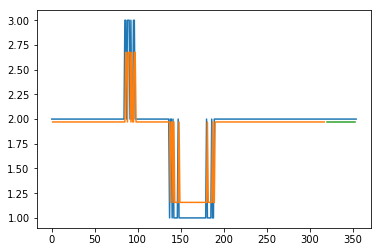

Epoch 1/20
 - 12s - loss: 0.0731
Epoch 2/20
 - 1s - loss: 0.0170
Epoch 3/20
 - 1s - loss: 0.0125
Epoch 4/20
 - 1s - loss: 0.0087
Epoch 5/20
 - 1s - loss: 0.0064
Epoch 6/20
 - 1s - loss: 0.0052
Epoch 7/20
 - 1s - loss: 0.0047
Epoch 8/20
 - 1s - loss: 0.0047
Epoch 9/20
 - 1s - loss: 0.0047
Epoch 10/20
 - 1s - loss: 0.0046
Epoch 11/20
 - 1s - loss: 0.0047
Epoch 12/20
 - 1s - loss: 0.0046
Epoch 13/20
 - 1s - loss: 0.0046
Epoch 14/20
 - 1s - loss: 0.0046
Epoch 15/20
 - 1s - loss: 0.0046
Epoch 16/20
 - 1s - loss: 0.0045
Epoch 17/20
 - 1s - loss: 0.0047
Epoch 18/20
 - 1s - loss: 0.0045
Epoch 19/20
 - 1s - loss: 0.0045
Epoch 20/20
 - 1s - loss: 0.0046
第18幅图像


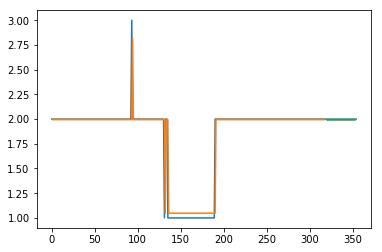

Epoch 1/20
 - 12s - loss: 0.3452
Epoch 2/20
 - 1s - loss: 0.1285
Epoch 3/20
 - 1s - loss: 0.1050
Epoch 4/20
 - 1s - loss: 0.0977
Epoch 5/20
 - 2s - loss: 0.0938
Epoch 6/20
 - 1s - loss: 0.0913
Epoch 7/20
 - 1s - loss: 0.0914
Epoch 8/20
 - 2s - loss: 0.0909
Epoch 9/20
 - 1s - loss: 0.0906
Epoch 10/20
 - 1s - loss: 0.0905
Epoch 11/20
 - 1s - loss: 0.0909
Epoch 12/20
 - 2s - loss: 0.0905
Epoch 13/20
 - 1s - loss: 0.0905
Epoch 14/20
 - 1s - loss: 0.0906
Epoch 15/20
 - 1s - loss: 0.0901
Epoch 16/20
 - 1s - loss: 0.0906
Epoch 17/20
 - 1s - loss: 0.0905
Epoch 18/20
 - 1s - loss: 0.0905
Epoch 19/20
 - 1s - loss: 0.0906
Epoch 20/20
 - 1s - loss: 0.0910
第19幅图像


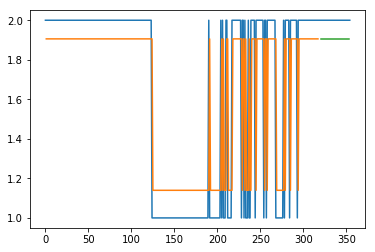

Epoch 1/20
 - 12s - loss: 0.3359
Epoch 2/20
 - 1s - loss: 0.1486
Epoch 3/20
 - 1s - loss: 0.1218
Epoch 4/20
 - 1s - loss: 0.1131
Epoch 5/20
 - 2s - loss: 0.1091
Epoch 6/20
 - 1s - loss: 0.1075
Epoch 7/20
 - 2s - loss: 0.1067
Epoch 8/20
 - 1s - loss: 0.1062
Epoch 9/20
 - 1s - loss: 0.1062
Epoch 10/20
 - 1s - loss: 0.1055
Epoch 11/20
 - 2s - loss: 0.1059
Epoch 12/20
 - 2s - loss: 0.1060
Epoch 13/20
 - 1s - loss: 0.1060
Epoch 14/20
 - 1s - loss: 0.1058
Epoch 15/20
 - 1s - loss: 0.1059
Epoch 16/20
 - 1s - loss: 0.1056
Epoch 17/20
 - 1s - loss: 0.1058
Epoch 18/20
 - 2s - loss: 0.1061
Epoch 19/20
 - 2s - loss: 0.1059
Epoch 20/20
 - 2s - loss: 0.1059
第20幅图像


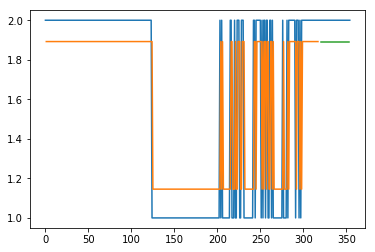

BaseStationnum7
Epoch 1/20
 - 13s - loss: 0.1043
Epoch 2/20
 - 1s - loss: 0.0326
Epoch 3/20
 - 1s - loss: 0.0196
Epoch 4/20
 - 2s - loss: 0.0094
Epoch 5/20
 - 1s - loss: 0.0036
Epoch 6/20
 - 2s - loss: 0.0017
Epoch 7/20
 - 1s - loss: 0.0014
Epoch 8/20
 - 1s - loss: 0.0014
Epoch 9/20
 - 1s - loss: 0.0014
Epoch 10/20
 - 1s - loss: 0.0014
Epoch 11/20
 - 1s - loss: 0.0014
Epoch 13/20
 - 2s - loss: 0.0014
Epoch 14/20
 - 1s - loss: 0.0014
Epoch 15/20
 - 1s - loss: 0.0014
Epoch 16/20
 - 1s - loss: 0.0014
Epoch 17/20
 - 1s - loss: 0.0014
Epoch 18/20
 - 1s - loss: 0.0014
Epoch 19/20
 - 1s - loss: 0.0014
Epoch 20/20
 - 2s - loss: 0.0014
第1幅图像


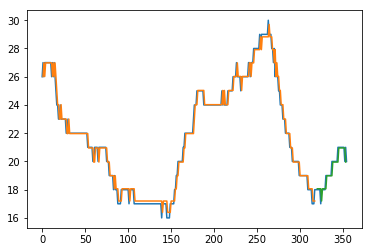

Epoch 1/20
 - 13s - loss: 0.1026
Epoch 2/20
 - 1s - loss: 0.0328
Epoch 3/20
 - 2s - loss: 0.0204
Epoch 4/20
 - 2s - loss: 0.0109
Epoch 5/20
 - 2s - loss: 0.0052
Epoch 6/20
 - 1s - loss: 0.0032
Epoch 7/20
 - 1s - loss: 0.0028
Epoch 8/20
 - 1s - loss: 0.0028
Epoch 9/20
 - 1s - loss: 0.0028
Epoch 10/20
 - 2s - loss: 0.0028
Epoch 11/20
 - 1s - loss: 0.0028
Epoch 12/20
 - 2s - loss: 0.0028
Epoch 13/20
 - 2s - loss: 0.0028
Epoch 14/20
 - 2s - loss: 0.0028
Epoch 15/20
 - 2s - loss: 0.0027
Epoch 16/20
 - 2s - loss: 0.0029
Epoch 17/20
 - 2s - loss: 0.0028
Epoch 18/20
 - 1s - loss: 0.0028
Epoch 19/20
 - 1s - loss: 0.0028
Epoch 20/20
 - 2s - loss: 0.0028
第2幅图像


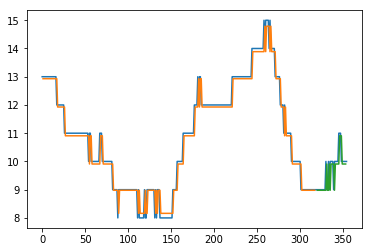

Epoch 1/20
 - 12s - loss: 0.1141
Epoch 2/20
 - 1s - loss: 0.0308
Epoch 3/20
 - 1s - loss: 0.0217
Epoch 4/20
 - 2s - loss: 0.0142
Epoch 5/20
 - 2s - loss: 0.0087
Epoch 6/20
 - 2s - loss: 0.0057
Epoch 7/20
 - 2s - loss: 0.0046
Epoch 8/20
 - 2s - loss: 0.0043
Epoch 9/20
 - 2s - loss: 0.0043
Epoch 10/20
 - 1s - loss: 0.0043
Epoch 11/20
 - 1s - loss: 0.0043
Epoch 12/20
 - 2s - loss: 0.0044
Epoch 13/20
 - 1s - loss: 0.0044
Epoch 14/20
 - 1s - loss: 0.0042
Epoch 15/20
 - 1s - loss: 0.0044
Epoch 16/20
 - 2s - loss: 0.0043
Epoch 17/20
 - 1s - loss: 0.0043
Epoch 18/20
 - 1s - loss: 0.0043
Epoch 19/20
 - 1s - loss: 0.0043
Epoch 20/20
 - 1s - loss: 0.0043
第3幅图像


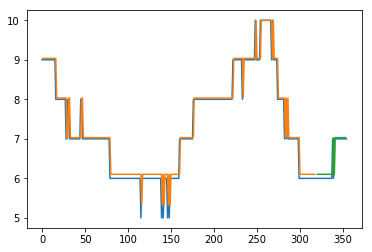

Epoch 1/20
 - 11s - loss: 0.1659
Epoch 2/20
 - 1s - loss: 0.0557
Epoch 3/20
 - 2s - loss: 0.0343
Epoch 4/20
 - 1s - loss: 0.0207
Epoch 5/20
 - 2s - loss: 0.0139
Epoch 6/20
 - 2s - loss: 0.0118
Epoch 7/20
 - 2s - loss: 0.0116
Epoch 8/20
 - 1s - loss: 0.0116
Epoch 9/20
 - 1s - loss: 0.0116
Epoch 10/20
 - 1s - loss: 0.0116
Epoch 11/20
 - 1s - loss: 0.0114
Epoch 12/20
 - 1s - loss: 0.0116
Epoch 13/20
 - 1s - loss: 0.0116
Epoch 14/20
 - 1s - loss: 0.0116
Epoch 15/20
 - 1s - loss: 0.0116
Epoch 16/20
 - 1s - loss: 0.0114
Epoch 17/20
 - 1s - loss: 0.0114
Epoch 18/20
 - 2s - loss: 0.0116
Epoch 19/20
 - 1s - loss: 0.0115
Epoch 20/20
 - 1s - loss: 0.0115
第4幅图像


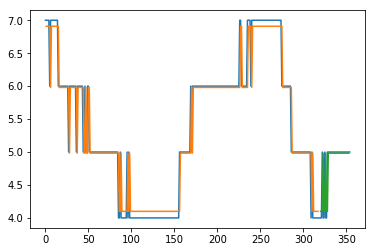

Epoch 1/20
 - 12s - loss: 0.1266
Epoch 2/20
 - 2s - loss: 0.0440
Epoch 3/20
 - 2s - loss: 0.0321
Epoch 4/20
 - 2s - loss: 0.0235
Epoch 5/20
 - 1s - loss: 0.0179
Epoch 6/20
 - 1s - loss: 0.0154
Epoch 7/20
 - 1s - loss: 0.0145
Epoch 8/20
 - 2s - loss: 0.0142
Epoch 9/20
 - 1s - loss: 0.0144
Epoch 10/20
 - 2s - loss: 0.0143
Epoch 11/20
 - 2s - loss: 0.0142
Epoch 12/20
 - 2s - loss: 0.0142
Epoch 13/20
 - 2s - loss: 0.0143
Epoch 14/20
 - 2s - loss: 0.0143
Epoch 15/20
 - 2s - loss: 0.0143
Epoch 16/20
 - 1s - loss: 0.0142
Epoch 17/20
 - 2s - loss: 0.0141
Epoch 18/20
 - 1s - loss: 0.0142
Epoch 19/20
 - 2s - loss: 0.0141
Epoch 20/20
 - 1s - loss: 0.0141
第5幅图像


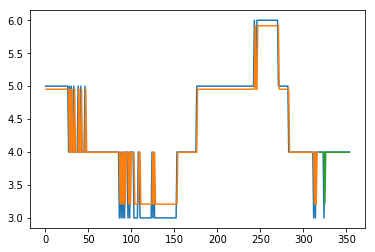

Epoch 1/20
 - 12s - loss: 0.1156
Epoch 2/20
 - 2s - loss: 0.0554
Epoch 3/20
 - 2s - loss: 0.0346
Epoch 4/20
 - 1s - loss: 0.0206
Epoch 5/20
 - 2s - loss: 0.0147
Epoch 6/20
 - 2s - loss: 0.0132
Epoch 7/20
 - 2s - loss: 0.0132
Epoch 8/20
 - 2s - loss: 0.0132
Epoch 9/20
 - 2s - loss: 0.0133
Epoch 10/20
 - 2s - loss: 0.0132
Epoch 11/20
 - 1s - loss: 0.0133
Epoch 12/20
 - 2s - loss: 0.0132
Epoch 13/20
 - 2s - loss: 0.0131
Epoch 14/20
 - 2s - loss: 0.0130
Epoch 15/20
 - 2s - loss: 0.0133
Epoch 16/20
 - 2s - loss: 0.0133
Epoch 17/20
 - 2s - loss: 0.0133
Epoch 18/20
 - 2s - loss: 0.0131
Epoch 19/20
 - 1s - loss: 0.0133
Epoch 20/20
 - 2s - loss: 0.0132
第6幅图像


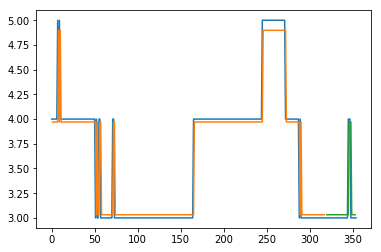

Epoch 1/20
 - 11s - loss: 0.1969
Epoch 2/20
 - 2s - loss: 0.0602
Epoch 3/20
 - 2s - loss: 0.0465
Epoch 4/20
 - 2s - loss: 0.0385
Epoch 5/20
 - 2s - loss: 0.0332
Epoch 6/20
 - 2s - loss: 0.0301
Epoch 7/20
 - 2s - loss: 0.0288
Epoch 8/20
 - 2s - loss: 0.0284
Epoch 9/20
 - 2s - loss: 0.0281
Epoch 10/20
 - 2s - loss: 0.0277
Epoch 11/20
 - 2s - loss: 0.0283
Epoch 12/20
 - 2s - loss: 0.0278
Epoch 13/20
 - 2s - loss: 0.0280
Epoch 14/20
 - 2s - loss: 0.0281
Epoch 15/20
 - 2s - loss: 0.0280
Epoch 16/20
 - 2s - loss: 0.0281
Epoch 17/20
 - 2s - loss: 0.0282
Epoch 18/20
 - 2s - loss: 0.0278
Epoch 19/20
 - 1s - loss: 0.0280
Epoch 20/20
 - 2s - loss: 0.0282
第7幅图像


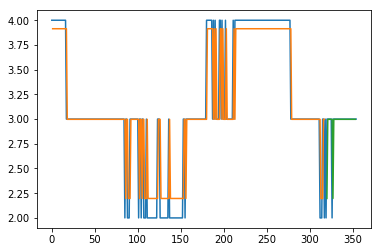

Epoch 1/20
 - 13s - loss: 0.1055
Epoch 2/20
 - 2s - loss: 0.0435
Epoch 3/20
 - 2s - loss: 0.0279
Epoch 4/20
 - 2s - loss: 0.0166
Epoch 5/20
 - 2s - loss: 0.0108
Epoch 6/20
 - 2s - loss: 0.0091
Epoch 7/20
 - 2s - loss: 0.0087
Epoch 8/20
 - 2s - loss: 0.0086
Epoch 9/20
 - 2s - loss: 0.0086
Epoch 10/20
 - 2s - loss: 0.0085
Epoch 11/20
 - 2s - loss: 0.0086
Epoch 12/20
 - 2s - loss: 0.0087
Epoch 13/20
 - 2s - loss: 0.0086
Epoch 14/20
 - 2s - loss: 0.0086
Epoch 15/20
 - 2s - loss: 0.0087
Epoch 16/20
 - 2s - loss: 0.0087
Epoch 17/20
 - 2s - loss: 0.0087
Epoch 18/20
 - 2s - loss: 0.0085
Epoch 19/20
 - 2s - loss: 0.0085
Epoch 20/20
 - 1s - loss: 0.0086
第8幅图像


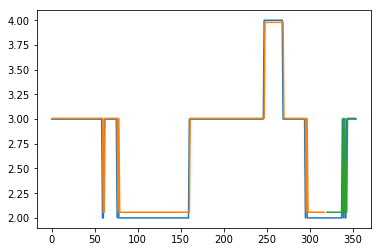

Epoch 1/20
 - 12s - loss: 0.2654
Epoch 2/20
 - 2s - loss: 0.1164
Epoch 3/20
 - 2s - loss: 0.0699
Epoch 4/20
 - 2s - loss: 0.0515
Epoch 5/20
 - 2s - loss: 0.0467
Epoch 6/20
 - 2s - loss: 0.0458
Epoch 7/20
 - 1s - loss: 0.0458
Epoch 8/20
 - 2s - loss: 0.0455
Epoch 9/20
 - 2s - loss: 0.0456
Epoch 10/20
 - 2s - loss: 0.0457
Epoch 11/20
 - 2s - loss: 0.0456
Epoch 12/20
 - 2s - loss: 0.0455
Epoch 13/20
 - 2s - loss: 0.0457
Epoch 14/20
 - 2s - loss: 0.0455
Epoch 15/20
 - 2s - loss: 0.0452
Epoch 16/20
 - 2s - loss: 0.0456
Epoch 17/20
 - 2s - loss: 0.0456
Epoch 18/20
 - 2s - loss: 0.0455
Epoch 19/20
 - 2s - loss: 0.0456
Epoch 20/20
 - 2s - loss: 0.0456
第9幅图像


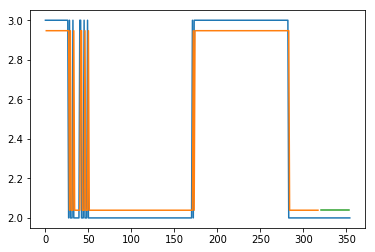

Epoch 1/20
 - 12s - loss: 0.1879
Epoch 2/20
 - 2s - loss: 0.1247
Epoch 3/20
 - 1s - loss: 0.0920
Epoch 4/20
 - 2s - loss: 0.0743
Epoch 5/20
 - 2s - loss: 0.0681
Epoch 6/20
 - 2s - loss: 0.0667
Epoch 7/20
 - 2s - loss: 0.0664
Epoch 8/20
 - 2s - loss: 0.0658
Epoch 9/20
 - 2s - loss: 0.0666
Epoch 10/20
 - 2s - loss: 0.0663
Epoch 11/20
 - 2s - loss: 0.0662
Epoch 12/20
 - 2s - loss: 0.0662
Epoch 13/20
 - 2s - loss: 0.0662
Epoch 14/20
 - 2s - loss: 0.0664
Epoch 15/20
 - 2s - loss: 0.0664
Epoch 16/20
 - 1s - loss: 0.0661
Epoch 17/20
 - 2s - loss: 0.0659
Epoch 18/20
 - 2s - loss: 0.0667
Epoch 19/20
 - 1s - loss: 0.0664
Epoch 20/20
 - 1s - loss: 0.0665
第10幅图像


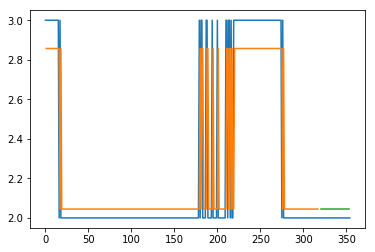

Epoch 1/20
 - 13s - loss: 0.1049
Epoch 2/20
 - 2s - loss: 0.0184
Epoch 3/20
 - 2s - loss: 0.0170
Epoch 4/20
 - 2s - loss: 0.0159
Epoch 5/20
 - 2s - loss: 0.0151
Epoch 6/20
 - 2s - loss: 0.0141
Epoch 7/20
 - 2s - loss: 0.0134
Epoch 8/20
 - 2s - loss: 0.0128
Epoch 9/20
 - 2s - loss: 0.0123
Epoch 10/20
 - 2s - loss: 0.0119
Epoch 11/20
 - 2s - loss: 0.0117
Epoch 12/20
 - 2s - loss: 0.0114
Epoch 13/20
 - 2s - loss: 0.0113
Epoch 14/20
 - 2s - loss: 0.0112
Epoch 15/20
 - 2s - loss: 0.0112
Epoch 16/20
 - 1s - loss: 0.0110
Epoch 17/20
 - 2s - loss: 0.0111
Epoch 18/20
 - 2s - loss: 0.0111
Epoch 19/20
 - 2s - loss: 0.0109
Epoch 20/20
 - 2s - loss: 0.0110
第11幅图像


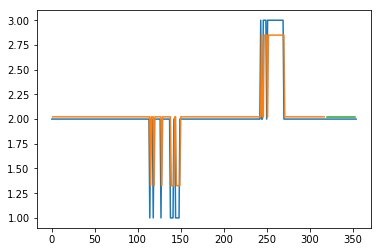

Epoch 1/20
 - 12s - loss: 0.0756
Epoch 2/20
 - 2s - loss: 0.0255
Epoch 3/20
 - 2s - loss: 0.0220
Epoch 4/20
 - 2s - loss: 0.0193
Epoch 5/20
 - 2s - loss: 0.0175
Epoch 6/20
 - 2s - loss: 0.0163
Epoch 7/20
 - 2s - loss: 0.0158
Epoch 8/20
 - 2s - loss: 0.0155
Epoch 9/20
 - 2s - loss: 0.0153
Epoch 10/20
 - 2s - loss: 0.0153
Epoch 11/20
 - 2s - loss: 0.0152
Epoch 12/20
 - 2s - loss: 0.0154
Epoch 13/20
第12幅图像


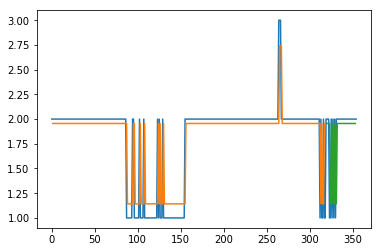

Epoch 1/20
 - 12s - loss: 0.3336
Epoch 2/20
 - 2s - loss: 0.0839
Epoch 3/20
 - 2s - loss: 0.0516
Epoch 4/20
 - 2s - loss: 0.0374
Epoch 5/20
 - 2s - loss: 0.0308
Epoch 6/20
 - 2s - loss: 0.0287
Epoch 7/20
 - 2s - loss: 0.0281
Epoch 8/20
 - 2s - loss: 0.0280
Epoch 9/20
 - 2s - loss: 0.0279
Epoch 10/20
 - 2s - loss: 0.0279
Epoch 11/20
 - 2s - loss: 0.0281
Epoch 12/20
 - 2s - loss: 0.0281
Epoch 13/20
 - 2s - loss: 0.0279
Epoch 14/20
 - 2s - loss: 0.0279
Epoch 15/20
 - 2s - loss: 0.0279
Epoch 16/20
 - 2s - loss: 0.0281
Epoch 17/20
 - 2s - loss: 0.0280
Epoch 18/20
 - 2s - loss: 0.0278
Epoch 19/20
 - 2s - loss: 0.0280
Epoch 20/20
 - 2s - loss: 0.0278
第13幅图像


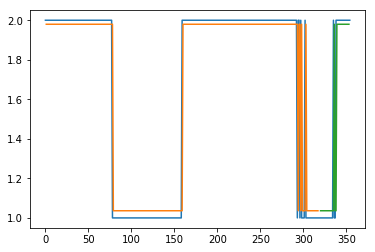

Epoch 1/20
 - 14s - loss: 0.3093
Epoch 2/20
 - 2s - loss: 0.1105
Epoch 3/20
 - 2s - loss: 0.0739
Epoch 4/20
 - 2s - loss: 0.0591
Epoch 5/20
 - 2s - loss: 0.0534
Epoch 6/20
 - 2s - loss: 0.0518
Epoch 7/20
 - 2s - loss: 0.0514
Epoch 8/20
 - 2s - loss: 0.0513
Epoch 9/20
 - 2s - loss: 0.0511
Epoch 10/20
 - 2s - loss: 0.0515
Epoch 11/20
 - 2s - loss: 0.0516
Epoch 12/20
 - 2s - loss: 0.0511
Epoch 13/20
 - 2s - loss: 0.0513
Epoch 14/20
 - 2s - loss: 0.0513
Epoch 15/20
 - 2s - loss: 0.0513
Epoch 16/20
 - 2s - loss: 0.0511
Epoch 17/20
 - 2s - loss: 0.0515
Epoch 18/20
 - 2s - loss: 0.0513
Epoch 19/20
 - 2s - loss: 0.0512
Epoch 20/20
 - 2s - loss: 0.0512
第14幅图像


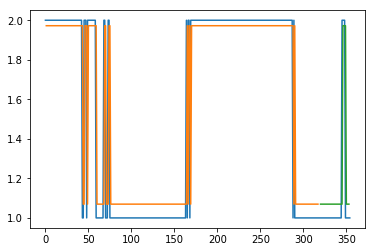

Epoch 1/20
 - 14s - loss: 0.2736
Epoch 2/20
 - 2s - loss: 0.1262
Epoch 3/20
 - 2s - loss: 0.0854
Epoch 4/20
 - 2s - loss: 0.0688
Epoch 5/20
 - 2s - loss: 0.0637
Epoch 6/20
 - 2s - loss: 0.0629
Epoch 7/20
 - 2s - loss: 0.0625
Epoch 8/20
 - 2s - loss: 0.0626
Epoch 9/20
 - 2s - loss: 0.0624
Epoch 10/20
 - 2s - loss: 0.0626
Epoch 11/20
 - 2s - loss: 0.0627
Epoch 12/20
 - 2s - loss: 0.0624
Epoch 13/20
 - 2s - loss: 0.0627
Epoch 14/20
 - 2s - loss: 0.0622
Epoch 15/20
 - 2s - loss: 0.0628
Epoch 16/20
 - 2s - loss: 0.0620
Epoch 17/20
 - 2s - loss: 0.0623
Epoch 18/20
 - 2s - loss: 0.0626
Epoch 19/20
 - 2s - loss: 0.0624
Epoch 20/20
 - 2s - loss: 0.0624
第15幅图像


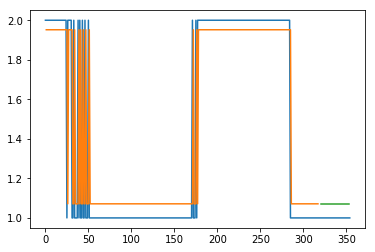

Epoch 1/20
 - 14s - loss: 0.2189
Epoch 2/20
 - 2s - loss: 0.1329
Epoch 3/20
 - 2s - loss: 0.0968
Epoch 4/20
 - 2s - loss: 0.0797
Epoch 5/20
 - 2s - loss: 0.0740
Epoch 6/20
 - 2s - loss: 0.0723
Epoch 7/20
 - 2s - loss: 0.0723
Epoch 8/20
 - 2s - loss: 0.0727
Epoch 9/20
 - 2s - loss: 0.0722
Epoch 10/20
 - 2s - loss: 0.0722
Epoch 11/20
 - 2s - loss: 0.0723
Epoch 12/20
 - 2s - loss: 0.0727
Epoch 13/20
 - 2s - loss: 0.0722
Epoch 14/20
 - 2s - loss: 0.0723
Epoch 15/20
 - 2s - loss: 0.0724
Epoch 16/20
 - 2s - loss: 0.0722
Epoch 17/20
 - 2s - loss: 0.0720
Epoch 18/20
 - 2s - loss: 0.0724
Epoch 19/20
 - 2s - loss: 0.0723
Epoch 20/20
 - 2s - loss: 0.0725
第16幅图像


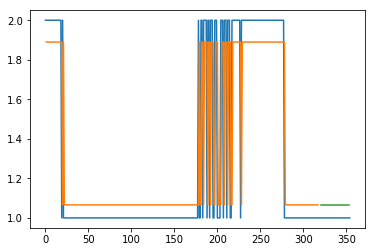

Epoch 1/20
 - 14s - loss: 0.1620
Epoch 2/20
 - 2s - loss: 0.1171
Epoch 3/20
 - 2s - loss: 0.0908
Epoch 4/20
 - 2s - loss: 0.0748
Epoch 5/20
 - 2s - loss: 0.0677
Epoch 6/20
 - 2s - loss: 0.0657
Epoch 7/20
 - 2s - loss: 0.0653
Epoch 8/20
 - 2s - loss: 0.0648
Epoch 9/20
 - 2s - loss: 0.0654
Epoch 10/20
 - 2s - loss: 0.0653
Epoch 11/20
 - 2s - loss: 0.0653
Epoch 12/20
 - 2s - loss: 0.0653
Epoch 13/20
 - 2s - loss: 0.0648
Epoch 14/20
 - 2s - loss: 0.0654
Epoch 15/20
 - 2s - loss: 0.0652
Epoch 16/20
 - 2s - loss: 0.0653
Epoch 17/20
 - 2s - loss: 0.0651
Epoch 18/20
 - 2s - loss: 0.0649
Epoch 19/20
 - 2s - loss: 0.0654
Epoch 20/20
 - 2s - loss: 0.0651
第17幅图像


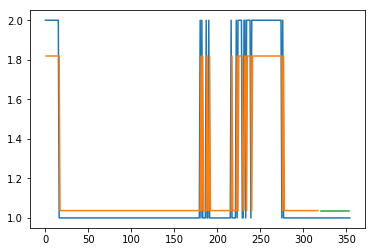

Epoch 1/20
 - 14s - loss: 0.0878
Epoch 2/20
 - 2s - loss: 0.0728
Epoch 3/20
 - 2s - loss: 0.0599
Epoch 4/20
 - 2s - loss: 0.0484
Epoch 5/20
 - 2s - loss: 0.0402
Epoch 6/20
 - 2s - loss: 0.0367
Epoch 7/20
 - 2s - loss: 0.0352
Epoch 8/20
 - 2s - loss: 0.0349
Epoch 9/20
 - 2s - loss: 0.0345
Epoch 10/20
 - 2s - loss: 0.0345
Epoch 11/20
 - 2s - loss: 0.0347
Epoch 12/20
 - 2s - loss: 0.0348
Epoch 13/20
 - 2s - loss: 0.0346
Epoch 14/20
 - 2s - loss: 0.0343
Epoch 15/20
 - 2s - loss: 0.0347
Epoch 16/20
 - 2s - loss: 0.0346
Epoch 17/20
 - 2s - loss: 0.0341
Epoch 18/20
 - 2s - loss: 0.0346
Epoch 19/20
 - 2s - loss: 0.0346
Epoch 20/20
 - 2s - loss: 0.0344
第18幅图像


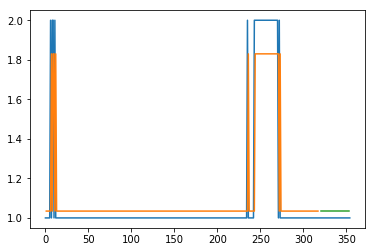

Epoch 1/20
 - 14s - loss: 0.0303
Epoch 2/20
 - 2s - loss: 0.0298
Epoch 3/20
 - 2s - loss: 0.0296
Epoch 4/20
 - 2s - loss: 0.0294
Epoch 5/20
 - 2s - loss: 0.0293
Epoch 6/20
 - 2s - loss: 0.0291
Epoch 7/20
 - 2s - loss: 0.0288
Epoch 8/20
 - 2s - loss: 0.0289
Epoch 9/20
 - 2s - loss: 0.0287
Epoch 10/20
 - 2s - loss: 0.0287
Epoch 11/20
 - 2s - loss: 0.0287
Epoch 12/20
 - 2s - loss: 0.0287
Epoch 13/20
 - 2s - loss: 0.0286
Epoch 14/20
 - 2s - loss: 0.0286
Epoch 15/20
 - 2s - loss: 0.0286
Epoch 16/20
 - 2s - loss: 0.0285
Epoch 17/20
 - 2s - loss: 0.0285
Epoch 18/20
 - 2s - loss: 0.0285
Epoch 19/20
 - 2s - loss: 0.0285
Epoch 20/20
 - 2s - loss: 0.0284
第19幅图像


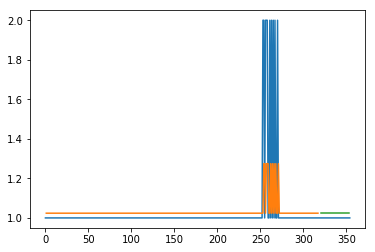

Epoch 1/20
 - 14s - loss: 0.0237
Epoch 2/20
 - 2s - loss: 0.0230
Epoch 3/20
 - 2s - loss: 0.0225
Epoch 4/20
 - 2s - loss: 0.0219
Epoch 5/20
 - 2s - loss: 0.0215
Epoch 6/20
 - 2s - loss: 0.0209
Epoch 7/20
 - 2s - loss: 0.0207
Epoch 8/20
 - 2s - loss: 0.0203
Epoch 9/20
 - 2s - loss: 0.0200
Epoch 10/20
 - 2s - loss: 0.0199
Epoch 11/20
 - 2s - loss: 0.0196
Epoch 12/20
 - 2s - loss: 0.0193
Epoch 13/20
 - 2s - loss: 0.0193
Epoch 14/20
 - 2s - loss: 0.0192
Epoch 15/20
 - 2s - loss: 0.0191
Epoch 16/20
 - 2s - loss: 0.0192
Epoch 17/20
 - 2s - loss: 0.0191
Epoch 18/20
 - 2s - loss: 0.0191
Epoch 19/20
 - 2s - loss: 0.0190
Epoch 20/20
 - 2s - loss: 0.0191
第20幅图像


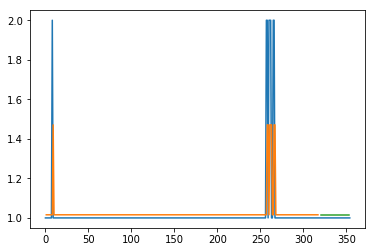

BaseStationnum8
Epoch 1/20
 - 14s - loss: 0.1011
Epoch 2/20
 - 2s - loss: 0.0238
Epoch 3/20
 - 2s - loss: 0.0167
Epoch 4/20
 - 2s - loss: 0.0107
Epoch 5/20
 - 2s - loss: 0.0060
Epoch 6/20
 - 2s - loss: 0.0031
Epoch 7/20
 - 2s - loss: 0.0019
Epoch 8/20
 - 2s - loss: 0.0016
Epoch 9/20
 - 2s - loss: 0.0016
Epoch 10/20
 - 2s - loss: 0.0016
Epoch 11/20
 - 2s - loss: 0.0016
Epoch 12/20
 - 2s - loss: 0.0016
Epoch 13/20
 - 2s - loss: 0.0015
Epoch 14/20
 - 2s - loss: 0.0016
Epoch 15/20
 - 2s - loss: 0.0016
Epoch 16/20
 - 2s - loss: 0.0016
Epoch 17/20
 - 2s - loss: 0.0016
Epoch 18/20
 - 2s - loss: 0.0016
Epoch 19/20
 - 2s - loss: 0.0015
Epoch 20/20
 - 2s - loss: 0.0016
第1幅图像


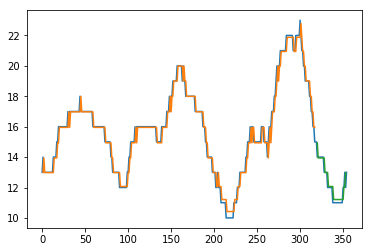

Epoch 1/20
 - 14s - loss: 0.1268
Epoch 2/20
 - 2s - loss: 0.0297
Epoch 3/20
 - 2s - loss: 0.0214
Epoch 4/20
 - 2s - loss: 0.0149
Epoch 5/20
 - 2s - loss: 0.0098
Epoch 6/20
 - 2s - loss: 0.0067
Epoch 7/20
 - 2s - loss: 0.0054
Epoch 8/20
 - 2s - loss: 0.0049
Epoch 9/20
 - 2s - loss: 0.0048
Epoch 10/20
 - 2s - loss: 0.0047
Epoch 11/20
 - 2s - loss: 0.0048
Epoch 12/20
 - 2s - loss: 0.0048
Epoch 13/20
 - 2s - loss: 0.0049
Epoch 14/20
 - 2s - loss: 0.0048
Epoch 15/20
 - 2s - loss: 0.0047
Epoch 16/20
 - 2s - loss: 0.0048
Epoch 17/20
 - 2s - loss: 0.0048
Epoch 18/20
 - 2s - loss: 0.0048
Epoch 19/20
 - 2s - loss: 0.0047
Epoch 20/20
 - 2s - loss: 0.0048
第2幅图像


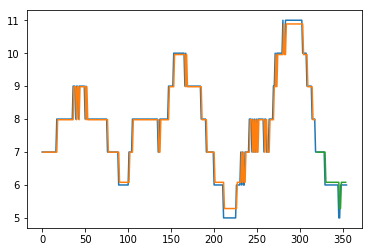

Epoch 1/20
 - 15s - loss: 0.1545
Epoch 2/20
 - 2s - loss: 0.0304
Epoch 3/20
 - 2s - loss: 0.0221
Epoch 4/20
 - 2s - loss: 0.0163
Epoch 5/20
 - 2s - loss: 0.0114
Epoch 6/20
 - 2s - loss: 0.0083
Epoch 7/20
 - 2s - loss: 0.0067
Epoch 8/20
 - 2s - loss: 0.0060
Epoch 9/20
 - 2s - loss: 0.0057
Epoch 10/20
 - 2s - loss: 0.0058
Epoch 11/20
 - 2s - loss: 0.0057
Epoch 12/20
 - 2s - loss: 0.0058
Epoch 13/20
 - 2s - loss: 0.0058
Epoch 14/20
 - 2s - loss: 0.0056
Epoch 15/20
 - 2s - loss: 0.0058
Epoch 16/20
 - 2s - loss: 0.0057
Epoch 17/20
 - 2s - loss: 0.0058
Epoch 18/20
 - 2s - loss: 0.0058
Epoch 19/20
 - 2s - loss: 0.0058
Epoch 20/20
 - 2s - loss: 0.0058
第3幅图像


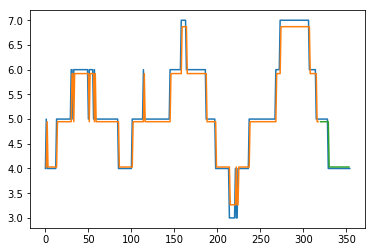

Epoch 1/20
 - 16s - loss: 0.0966
Epoch 2/20
 - 2s - loss: 0.0163
Epoch 3/20
 - 2s - loss: 0.0131
Epoch 4/20
 - 2s - loss: 0.0104
Epoch 5/20
 - 2s - loss: 0.0080
Epoch 6/20
 - 2s - loss: 0.0060
Epoch 7/20
 - 2s - loss: 0.0048
Epoch 8/20
 - 2s - loss: 0.0041
Epoch 9/20
 - 2s - loss: 0.0038
Epoch 10/20
 - 2s - loss: 0.0036
Epoch 11/20
 - 2s - loss: 0.0036
Epoch 12/20
 - 2s - loss: 0.0037
Epoch 13/20
 - 2s - loss: 0.0037
Epoch 14/20
 - 2s - loss: 0.0036
Epoch 15/20
 - 2s - loss: 0.0036
Epoch 16/20
 - 2s - loss: 0.0036
Epoch 17/20
 - 2s - loss: 0.0036
Epoch 18/20
 - 2s - loss: 0.0036
Epoch 19/20
 - 2s - loss: 0.0036
Epoch 20/20
 - 2s - loss: 0.0037
第4幅图像


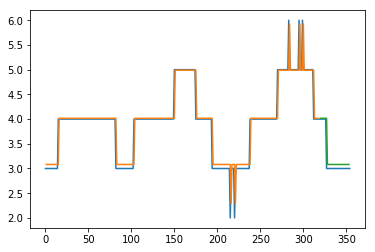

Epoch 1/20
 - 16s - loss: 0.1701
Epoch 2/20
 - 2s - loss: 0.0403
Epoch 3/20
 - 2s - loss: 0.0305
Epoch 4/20
 - 2s - loss: 0.0234
Epoch 5/20
 - 2s - loss: 0.0181
Epoch 6/20
 - 2s - loss: 0.0147
Epoch 7/20
 - 2s - loss: 0.0130
Epoch 8/20
 - 2s - loss: 0.0124
Epoch 9/20
 - 2s - loss: 0.0122
Epoch 10/20
 - 2s - loss: 0.0122
Epoch 11/20
 - 2s - loss: 0.0120
Epoch 12/20
 - 2s - loss: 0.0121
Epoch 13/20
 - 2s - loss: 0.0122
Epoch 14/20
 - 2s - loss: 0.0121
Epoch 15/20
 - 2s - loss: 0.0120
Epoch 16/20
 - 2s - loss: 0.0121
Epoch 17/20
 - 2s - loss: 0.0122
Epoch 18/20
 - 2s - loss: 0.0120
Epoch 19/20
 - 2s - loss: 0.0121
Epoch 20/20
 - 2s - loss: 0.0122
第5幅图像


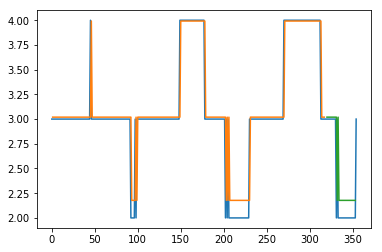

Epoch 1/20
 - 17s - loss: 0.1061
Epoch 2/20
 - 2s - loss: 0.0479
Epoch 3/20
 - 2s - loss: 0.0367
Epoch 4/20
 - 2s - loss: 0.0292
Epoch 5/20
 - 2s - loss: 0.0252
Epoch 6/20
 - 2s - loss: 0.0236
Epoch 7/20
 - 2s - loss: 0.0233
Epoch 8/20
 - 2s - loss: 0.0229
Epoch 9/20
 - 2s - loss: 0.0228
Epoch 10/20
 - 2s - loss: 0.0229
Epoch 11/20
 - 2s - loss: 0.0229
Epoch 12/20
 - 2s - loss: 0.0230
Epoch 13/20
 - 2s - loss: 0.0230
Epoch 14/20
 - 2s - loss: 0.0229
Epoch 15/20
 - 2s - loss: 0.0229
Epoch 16/20
 - 2s - loss: 0.0229
Epoch 17/20
 - 2s - loss: 0.0230
Epoch 18/20
 - 2s - loss: 0.0229
Epoch 19/20
 - 2s - loss: 0.0229
Epoch 20/20
 - 2s - loss: 0.0229
第6幅图像


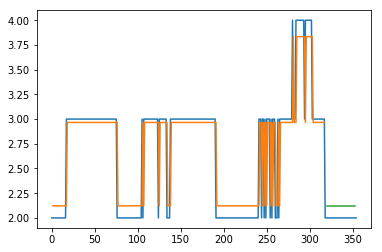

Epoch 1/20
 - 16s - loss: 0.1664
Epoch 2/20
 - 2s - loss: 0.0306
Epoch 3/20
 - 2s - loss: 0.0251
Epoch 4/20
 - 2s - loss: 0.0215
Epoch 5/20
 - 2s - loss: 0.0180
Epoch 6/20
 - 2s - loss: 0.0157
Epoch 7/20
 - 2s - loss: 0.0142
Epoch 8/20
 - 2s - loss: 0.0131
Epoch 9/20
 - 2s - loss: 0.0125
Epoch 10/20
 - 2s - loss: 0.0122
Epoch 11/20
 - 2s - loss: 0.0122
Epoch 12/20
 - 2s - loss: 0.0121
Epoch 13/20
 - 2s - loss: 0.0123
Epoch 14/20
 - 2s - loss: 0.0119
Epoch 15/20
 - 2s - loss: 0.0121
Epoch 16/20
 - 2s - loss: 0.0120
Epoch 17/20
 - 2s - loss: 0.0120
Epoch 18/20
 - 2s - loss: 0.0121
Epoch 19/20
 - 2s - loss: 0.0120
Epoch 20/20
 - 2s - loss: 0.0121
第7幅图像


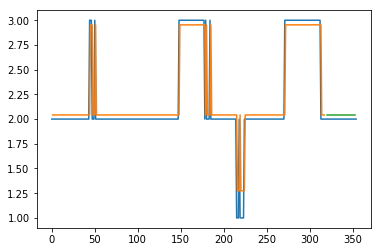

Epoch 1/20
 - 15s - loss: 0.1241
Epoch 2/20
 - 2s - loss: 0.0272
Epoch 3/20
 - 2s - loss: 0.0229
Epoch 4/20
 - 2s - loss: 0.0201
Epoch 5/20
 - 2s - loss: 0.0177
Epoch 6/20
 - 2s - loss: 0.0156
Epoch 7/20
 - 2s - loss: 0.0141
Epoch 8/20
 - 2s - loss: 0.0131
Epoch 9/20
 - 2s - loss: 0.0125
Epoch 10/20
 - 2s - loss: 0.0122
Epoch 11/20
 - 2s - loss: 0.0121
Epoch 12/20
 - 2s - loss: 0.0120
Epoch 13/20
 - 2s - loss: 0.0121
Epoch 14/20
 - 2s - loss: 0.0120
Epoch 15/20
 - 2s - loss: 0.0119
Epoch 16/20
 - 2s - loss: 0.0121
Epoch 17/20
 - 2s - loss: 0.0120
Epoch 18/20
 - 2s - loss: 0.0120
Epoch 19/20
 - 2s - loss: 0.0121
Epoch 20/20
 - 2s - loss: 0.0120
第8幅图像


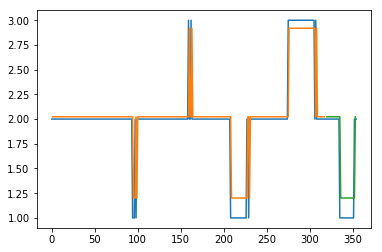

Epoch 1/20
 - 15s - loss: 0.0753
Epoch 2/20
 - 2s - loss: 0.0210
Epoch 3/20
 - 2s - loss: 0.0157
Epoch 4/20
 - 2s - loss: 0.0119
Epoch 5/20
 - 2s - loss: 0.0097
Epoch 6/20
 - 2s - loss: 0.0087
Epoch 7/20
 - 2s - loss: 0.0084
Epoch 8/20
 - 2s - loss: 0.0083
Epoch 9/20
 - 2s - loss: 0.0084
Epoch 10/20
 - 2s - loss: 0.0083
Epoch 11/20
 - 2s - loss: 0.0083
Epoch 12/20
 - 2s - loss: 0.0083
Epoch 13/20
 - 2s - loss: 0.0083
Epoch 14/20
 - 2s - loss: 0.0083
Epoch 15/20
 - 2s - loss: 0.0082
Epoch 16/20
 - 2s - loss: 0.0082
Epoch 17/20
 - 2s - loss: 0.0082
Epoch 18/20
 - 2s - loss: 0.0082
Epoch 19/20
 - 2s - loss: 0.0083
Epoch 20/20
 - 2s - loss: 0.0083
第9幅图像


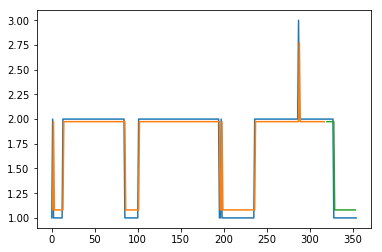

Epoch 1/20
 - 15s - loss: 0.3497
Epoch 2/20
 - 2s - loss: 0.1145
Epoch 3/20
 - 2s - loss: 0.0854
Epoch 4/20
 - 2s - loss: 0.0751
Epoch 5/20
 - 2s - loss: 0.0704
Epoch 6/20
 - 2s - loss: 0.0679
Epoch 7/20
 - 2s - loss: 0.0677
Epoch 8/20
 - 2s - loss: 0.0674
Epoch 9/20
 - 2s - loss: 0.0675
Epoch 10/20
 - 2s - loss: 0.0670
Epoch 11/20
 - 2s - loss: 0.0676
Epoch 12/20
 - 2s - loss: 0.0670
Epoch 13/20
 - 2s - loss: 0.0676
Epoch 14/20
 - 2s - loss: 0.0673
Epoch 15/20
 - 2s - loss: 0.0668
Epoch 16/20
 - 2s - loss: 0.0673
Epoch 17/20
 - 2s - loss: 0.0670
Epoch 18/20
 - 2s - loss: 0.0671
Epoch 19/20
 - 2s - loss: 0.0673
Epoch 20/20
 - 2s - loss: 0.0673
第10幅图像


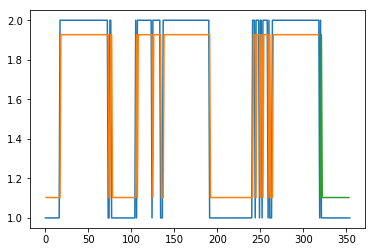

Epoch 1/20
 - 17s - loss: 0.2263
Epoch 2/20
 - 2s - loss: 0.1247
Epoch 3/20
 - 2s - loss: 0.0831
Epoch 4/20
 - 2s - loss: 0.0654
Epoch 5/20
 - 2s - loss: 0.0604
Epoch 6/20
 - 2s - loss: 0.0595
Epoch 7/20
 - 2s - loss: 0.0593
Epoch 8/20
 - 2s - loss: 0.0592
Epoch 9/20
 - 2s - loss: 0.0598
Epoch 10/20
 - 2s - loss: 0.0592
Epoch 11/20
 - 2s - loss: 0.0593
Epoch 12/20
 - 2s - loss: 0.0593
Epoch 13/20
 - 2s - loss: 0.0593
Epoch 14/20
 - 2s - loss: 0.0591
Epoch 15/20
 - 2s - loss: 0.0593
Epoch 16/20
 - 2s - loss: 0.0598
Epoch 17/20
 - 2s - loss: 0.0594
Epoch 18/20
 - 2s - loss: 0.0594
Epoch 19/20
 - 2s - loss: 0.0594
Epoch 20/20
 - 2s - loss: 0.0595
第11幅图像


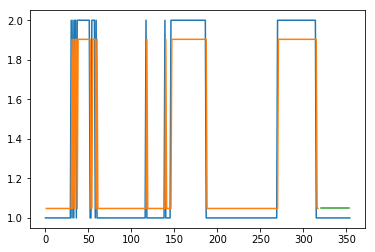

Epoch 1/20
 - 17s - loss: 0.1543
Epoch 2/20
 - 2s - loss: 0.0976
Epoch 3/20
 - 2s - loss: 0.0568
Epoch 4/20
 - 2s - loss: 0.0325
Epoch 5/20
 - 2s - loss: 0.0258
Epoch 6/20
 - 2s - loss: 0.0248
Epoch 7/20
 - 2s - loss: 0.0248
Epoch 8/20
 - 2s - loss: 0.0247
Epoch 9/20
 - 2s - loss: 0.0246
Epoch 10/20
 - 2s - loss: 0.0246
Epoch 11/20
 - 2s - loss: 0.0247
Epoch 12/20
 - 2s - loss: 0.0247
Epoch 13/20
 - 2s - loss: 0.0248
Epoch 14/20
 - 2s - loss: 0.0246
Epoch 15/20
 - 2s - loss: 0.0246
Epoch 16/20
 - 2s - loss: 0.0248
Epoch 17/20
 - 2s - loss: 0.0248
Epoch 18/20
 - 2s - loss: 0.0247
Epoch 19/20
 - 2s - loss: 0.0246
Epoch 20/20
 - 2s - loss: 0.0247
第12幅图像


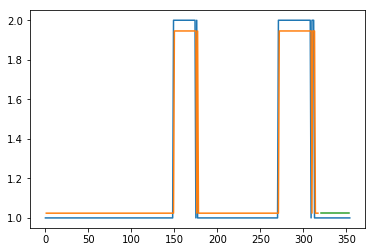

Epoch 1/20
 - 18s - loss: 0.1029
Epoch 2/20
 - 2s - loss: 0.0826
Epoch 3/20
 - 2s - loss: 0.0666
Epoch 4/20
 - 2s - loss: 0.0532
Epoch 5/20
 - 2s - loss: 0.0453
Epoch 6/20
 - 2s - loss: 0.0420
Epoch 7/20
 - 2s - loss: 0.0409
Epoch 8/20
 - 2s - loss: 0.0405
Epoch 9/20
 - 2s - loss: 0.0402
Epoch 10/20
 - 2s - loss: 0.0403
Epoch 11/20
 - 2s - loss: 0.0403
Epoch 12/20
 - 2s - loss: 0.0403
Epoch 13/20
 - 2s - loss: 0.0403
Epoch 14/20
 - 2s - loss: 0.0403
Epoch 15/20
 - 2s - loss: 0.0401
Epoch 16/20
 - 2s - loss: 0.0403
Epoch 17/20
 - 2s - loss: 0.0402
Epoch 18/20
 - 2s - loss: 0.0403
Epoch 19/20
 - 2s - loss: 0.0404
Epoch 20/20
 - 2s - loss: 0.0402
第13幅图像


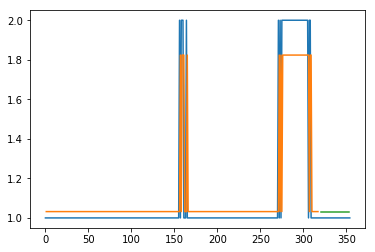

Epoch 1/20
 - 18s - loss: 0.0524
Epoch 2/20
 - 2s - loss: 0.0465
Epoch 3/20
 - 2s - loss: 0.0409
Epoch 4/20
 - 2s - loss: 0.0355
Epoch 5/20
 - 2s - loss: 0.0308
Epoch 6/20
 - 2s - loss: 0.0272
Epoch 7/20
 - 2s - loss: 0.0251
Epoch 8/20
 - 2s - loss: 0.0240
Epoch 9/20
 - 2s - loss: 0.0235
Epoch 10/20
 - 2s - loss: 0.0230
Epoch 11/20
 - 2s - loss: 0.0230
Epoch 12/20
 - 2s - loss: 0.0230
Epoch 13/20
 - 2s - loss: 0.0228
Epoch 14/20
 - 2s - loss: 0.0228
Epoch 15/20
 - 2s - loss: 0.0229
Epoch 16/20
 - 2s - loss: 0.0228
Epoch 17/20
 - 2s - loss: 0.0227
Epoch 18/20
 - 2s - loss: 0.0227
Epoch 19/20
 - 2s - loss: 0.0228
Epoch 20/20
 - 2s - loss: 0.0228
第14幅图像


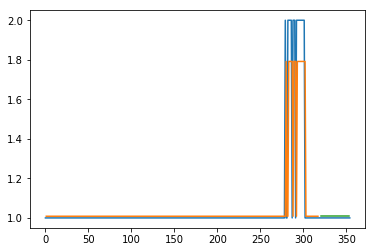

Epoch 1/20
 - 19s - loss: 0.0092
Epoch 2/20
 - 2s - loss: 0.0092
Epoch 3/20
 - 2s - loss: 0.0092
Epoch 4/20
 - 2s - loss: 0.0091
Epoch 5/20
 - 2s - loss: 0.0091
Epoch 6/20
 - 2s - loss: 0.0090
Epoch 7/20
 - 2s - loss: 0.0090
Epoch 8/20
 - 2s - loss: 0.0089
Epoch 9/20
 - 2s - loss: 0.0088
Epoch 10/20
 - 2s - loss: 0.0088
Epoch 11/20
 - 2s - loss: 0.0088
Epoch 12/20
 - 2s - loss: 0.0088
Epoch 13/20
 - 2s - loss: 0.0088
Epoch 14/20
 - 2s - loss: 0.0087
Epoch 15/20
 - 2s - loss: 0.0087
Epoch 16/20
 - 2s - loss: 0.0087
Epoch 17/20
 - 2s - loss: 0.0087
Epoch 18/20
 - 2s - loss: 0.0086
Epoch 19/20
 - 2s - loss: 0.0087
Epoch 20/20
 - 2s - loss: 0.0086
第15幅图像


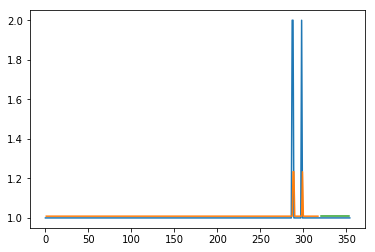

Epoch 1/20
 - 17s - loss: 0.0000e+00
Epoch 2/20
 - 2s - loss: 0.0000e+00
Epoch 3/20
 - 2s - loss: 0.0000e+00
Epoch 4/20
 - 2s - loss: 0.0000e+00
Epoch 5/20
 - 2s - loss: 0.0000e+00
Epoch 6/20
 - 2s - loss: 0.0000e+00
Epoch 7/20
 - 2s - loss: 0.0000e+00
Epoch 8/20
 - 2s - loss: 0.0000e+00
Epoch 9/20
 - 2s - loss: 0.0000e+00
Epoch 10/20
 - 2s - loss: 0.0000e+00
Epoch 11/20
 - 2s - loss: 0.0000e+00
Epoch 12/20
 - 2s - loss: 0.0000e+00
Epoch 13/20
 - 2s - loss: 0.0000e+00
Epoch 14/20
 - 2s - loss: 0.0000e+00
Epoch 15/20
 - 2s - loss: 0.0000e+00
Epoch 16/20
 - 2s - loss: 0.0000e+00
Epoch 17/20
 - 2s - loss: 0.0000e+00
Epoch 18/20
 - 2s - loss: 0.0000e+00
Epoch 19/20
 - 2s - loss: 0.0000e+00
Epoch 20/20
 - 2s - loss: 0.0000e+00
第16幅图像


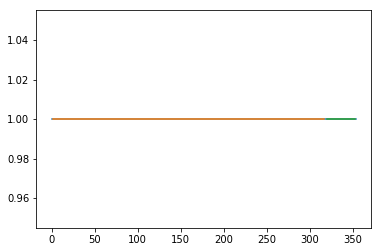

Epoch 1/20
 - 17s - loss: 0.0000e+00
Epoch 2/20
 - 2s - loss: 0.0000e+00
Epoch 3/20
 - 2s - loss: 0.0000e+00
Epoch 4/20
 - 2s - loss: 0.0000e+00
Epoch 5/20
 - 2s - loss: 0.0000e+00
Epoch 6/20
 - 2s - loss: 0.0000e+00
Epoch 7/20
 - 2s - loss: 0.0000e+00
Epoch 8/20
 - 2s - loss: 0.0000e+00
Epoch 9/20
 - 2s - loss: 0.0000e+00
Epoch 10/20
 - 2s - loss: 0.0000e+00
Epoch 11/20
 - 2s - loss: 0.0000e+00
Epoch 12/20
 - 2s - loss: 0.0000e+00
Epoch 13/20
 - 2s - loss: 0.0000e+00
Epoch 14/20
 - 2s - loss: 0.0000e+00
Epoch 15/20
 - 2s - loss: 0.0000e+00
Epoch 16/20
 - 2s - loss: 0.0000e+00
Epoch 17/20
 - 2s - loss: 0.0000e+00
Epoch 18/20
 - 2s - loss: 0.0000e+00
Epoch 19/20
 - 2s - loss: 0.0000e+00
Epoch 20/20
 - 2s - loss: 0.0000e+00
第17幅图像


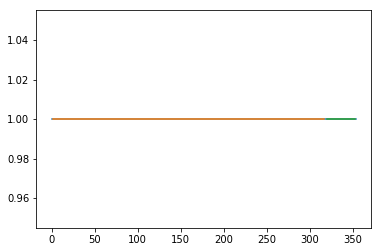

Epoch 1/20
 - 17s - loss: 0.0000e+00
Epoch 2/20
 - 2s - loss: 0.0000e+00
Epoch 3/20
 - 2s - loss: 0.0000e+00
Epoch 4/20
 - 2s - loss: 0.0000e+00
Epoch 5/20
 - 2s - loss: 0.0000e+00
Epoch 6/20
 - 2s - loss: 0.0000e+00
Epoch 7/20
 - 2s - loss: 0.0000e+00
Epoch 8/20
 - 2s - loss: 0.0000e+00
Epoch 9/20
 - 2s - loss: 0.0000e+00
Epoch 10/20
 - 2s - loss: 0.0000e+00
Epoch 11/20
 - 2s - loss: 0.0000e+00
Epoch 12/20
 - 2s - loss: 0.0000e+00
Epoch 13/20
 - 2s - loss: 0.0000e+00
Epoch 14/20
 - 2s - loss: 0.0000e+00
Epoch 15/20
 - 2s - loss: 0.0000e+00
Epoch 16/20
 - 2s - loss: 0.0000e+00
Epoch 17/20
 - 2s - loss: 0.0000e+00
Epoch 18/20
 - 2s - loss: 0.0000e+00
Epoch 19/20
 - 2s - loss: 0.0000e+00
Epoch 20/20
 - 2s - loss: 0.0000e+00
第18幅图像


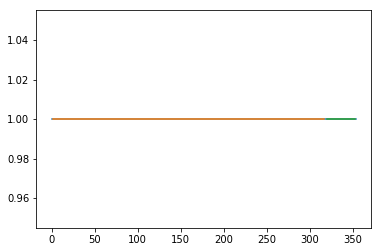

Epoch 1/20
 - 18s - loss: 0.3871
Epoch 2/20
 - 2s - loss: 0.0130
Epoch 3/20
 - 2s - loss: 0.0078
Epoch 4/20
 - 2s - loss: 0.0078
Epoch 5/20
 - 2s - loss: 0.0078
Epoch 6/20
 - 2s - loss: 0.0077
Epoch 7/20
 - 2s - loss: 0.0077
Epoch 8/20
 - 2s - loss: 0.0076
Epoch 9/20
 - 2s - loss: 0.0076
Epoch 10/20
 - 2s - loss: 0.0077
Epoch 11/20
 - 2s - loss: 0.0075
Epoch 12/20
 - 2s - loss: 0.0074
Epoch 13/20
 - 2s - loss: 0.0075
Epoch 14/20
 - 2s - loss: 0.0074
Epoch 15/20
 - 2s - loss: 0.0074
Epoch 16/20
 - 2s - loss: 0.0073
Epoch 17/20
 - 2s - loss: 0.0073
Epoch 18/20
 - 2s - loss: 0.0073
Epoch 19/20
 - 2s - loss: 0.0072
Epoch 20/20
 - 2s - loss: 0.0072
第19幅图像


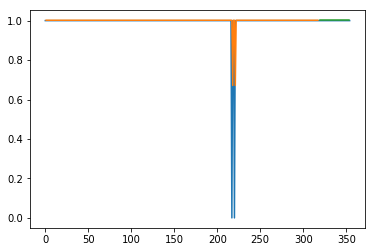

Epoch 1/20
 - 20s - loss: 0.3875
Epoch 2/20
 - 2s - loss: 0.0120
Epoch 3/20
 - 2s - loss: 0.0078
Epoch 4/20
 - 2s - loss: 0.0078
Epoch 5/20
 - 2s - loss: 0.0077
Epoch 6/20
 - 2s - loss: 0.0077
Epoch 7/20
 - 2s - loss: 0.0076
Epoch 8/20
 - 2s - loss: 0.0077
Epoch 9/20
 - 2s - loss: 0.0076
Epoch 10/20
 - 2s - loss: 0.0076
Epoch 11/20
 - 2s - loss: 0.0075
Epoch 12/20
 - 2s - loss: 0.0075
Epoch 13/20
 - 2s - loss: 0.0075
Epoch 14/20
 - 2s - loss: 0.0075
Epoch 15/20
 - 2s - loss: 0.0074
Epoch 16/20
 - 2s - loss: 0.0073
Epoch 17/20
 - 2s - loss: 0.0073
Epoch 18/20
 - 2s - loss: 0.0073
Epoch 19/20
 - 2s - loss: 0.0071
Epoch 20/20
 - 2s - loss: 0.0072
第20幅图像


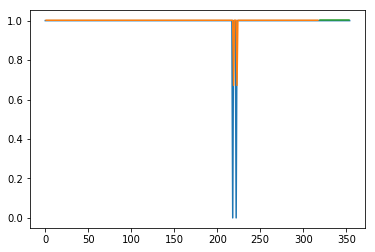

In [6]:
for station in range(5,9):
  name = "BaseStationnum" + str(station)
  DataProcess(name, station)
  predict(name)